## Import Libraries

In [1]:
!pip install --upgrade gensim
!pip install -U sentence-transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 351 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 4.7 MB 17.2 MB/s 
     |████████████████████████████████| 1.3 MB 63.4 MB/s 
     |████████████████████████████████| 101 kB 14.4 MB/s 
     |████████████████████████████████| 596 kB 92.5 MB/s 
     |████████████████████████████████| 6.6 MB 61.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=36bf12261c876756a6ab43699ec1217f07475193cc4f392f85c448929593eda1
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd

In [2]:
import pandas as pd
import numpy as np
import re
import os
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Import the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NLP Project/training.1600000.processed.noemoticon.csv',
                   encoding='latin', 
                   names = ['sentiment','id','date','query','user','tweet'])


## Data Pre-processing

### Clean the tweets

In [ ]:
def clean_tweet(message):
  '''
  Input:
      message: a string containing a message.
  Output:
      preprocessed_message_list: a list of words containing the processed message. 
  '''
  
  abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "he's":"he is",
    "there's":"there is",
    "We're":"We are",
    "That's":"That is",
    "won't":"will not",
    "they're":"they are",
    "Can't":"Cannot",
    "wasn't":"was not",
    "don\x89Ûªt":"do not",
    "aren't":"are not",
    "isn't":"is not",
    "What's":"What is",
    "haven't":"have not",
    "hasn't":"has not",
    "There's":"There is",
    "He's":"He is",
    "It's":"It is",
    "You're":"You are",
    "I'M":"I am",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "i'm":"I am",
    "I\x89Ûªm":"I am",
    "I'm":"I am",
    "Isn't":"is not",
    "Here's":"Here is",
    "you've":"you have",
    "you\x89Ûªve":"you have",
    "we're":"we are",
    "what's":"what is",
    "couldn't":"could not",
    "we've":"we have",
    "it\x89Ûªs":"it is",
    "doesn\x89Ûªt":"does not",
    "It\x89Ûªs":"It is",
    "Here\x89Ûªs":"Here is",
    "who's":"who is",
    "I\x89Ûªve":"I have",
    "y'all":"you all",
    "can\x89Ûªt":"cannot",
    "would've":"would have",
    "it'll":"it will",
    "we'll":"we will",
    "wouldn\x89Ûªt":"would not",
    "We've":"We have",
    "he'll":"he will",
    "Y'all":"You all",
    "Weren't":"Were not",
    "Didn't":"Did not",
    "they'll":"they will",
    "they'd":"they would",
    "DON'T":"DO NOT",
    "That\x89Ûªs":"That is",
    "they've":"they have",
    "i'd":"I would",
    "should've":"should have",
    "You\x89Ûªre":"You are",
    "where's":"where is",
    "Don\x89Ûªt":"Do not",
    "we'd":"we would",
    "i'll":"I will",
    "weren't":"were not",
    "They're":"They are",
    "Can\x89Ûªt":"Cannot",
    "you\x89Ûªll":"you will",
    "I\x89Ûªd":"I would",
    "let's":"let us",
    "it's":"it is",
    "can't":"cannot",
    "don't":"do not",
    "you're":"you are",
    "i've":"I have",
    "that's":"that is",
    "i'll":"I will",
    "doesn't":"does not",
    "i'd":"I would",
    "didn't":"did not",
    "ain't":"am not",
    "you'll":"you will",
    "I've":"I have",
    "Don't":"do not",
    "I'll":"I will",
    "I'd":"I would",
    "Let's":"Let us",
    "you'd":"You would",
    "It's":"It is",
    "Ain't":"am not",
    "Haven't":"Have not",
    "Could've":"Could have",
    "youve":"you have",
    "donå«t":"do not", 
    "some1":"someone",
    "yrs":"years",
    "hrs":"hours",
    "2morow|2moro":"tomorrow",
    "2day":"today",
    "4got|4gotten":"forget",
    "b-day|bday":"b-day",
    "mother's":"mother",
    "mom's":"mom",
    "dad's":"dad",
    "hahah|hahaha|hahahaha":"haha",
    "lmao|lolz|rofl":"lol",
    "thanx|thnx":"thanks",
    "goood":"good",
    "some1":"someone",
    "some1":"someone",
  }

  stopword = set(stopwords.words('english'))

  urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
  userPattern = '@[^\s]+'
  some = 'amp,today,tomorrow,going,girl'
  sequencePattern   = r"(.)\1\1+"
  seqReplacePattern = r"\1\1"

  # Removing urls
  message = re.sub(urlPattern,'',message)
  # Removing all @username.
  message = re.sub(userPattern,'', message) 
  #remove some words
  message= re.sub(some,'',message)

  message = message.lower()

  #Remove punctuation
  message = re.sub(r'[^\w\s]', ' ', message)

  # Replace 3 or more consecutive letters by 2 letter.
  message = re.sub(sequencePattern, seqReplacePattern, message)
  #Performing tokenization
  words = word_tokenize(message)

  #Editing abbrevations
  words = [abbreviations[w] if w in abbreviations.keys() else w for w in words]
  
  #Removing stopwords
  words = [w for w in words if w not in stopword]
  
  #Performing Lematization
  wordLemm = WordNetLemmatizer()
  finalwords=[]
  for w in words:
    if len(w)>1:
      word = wordLemm.lemmatize(w)
      finalwords.append(word)
  message = ' '.join(finalwords)
  
  return message

In [ ]:
data["clean_tweet"] = data["tweet"].apply(lambda x: clean_tweet(x))

In [ ]:
data.sample(10)

### Save or Load the clean tweet dataset

In [3]:
#data.to_csv("/content/drive/MyDrive/NLP Project/cleaned_tweet.csv")

In [4]:
# Load the saved clean_tweet dataframe
data = pd.read_csv("/content/drive/MyDrive/NLP Project/cleaned_tweet.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)

### Changing the notation to (0=Negative,1=Positive) from (0=negative,4=Positive)

In [5]:
data['sentiment']=data['sentiment'].replace(4,1)

### Split the dataset into train and test dataset

In [6]:
from sklearn.model_selection import train_test_split

X = data[["clean_tweet"]]
y = data["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=47)

In [7]:
# Shape of X and y

X.shape, y.shape

((1600000, 1), (1600000,))

In [8]:
# Checking the class distribution in the train dataset

y_train.value_counts(normalize=True).round(3)

1    0.5
0    0.5
Name: sentiment, dtype: float64

In [9]:
# Checking the class distribution in the test dataset

y_test.value_counts(normalize=True).round(3)

0    0.501
1    0.499
Name: sentiment, dtype: float64

### Data Visualization

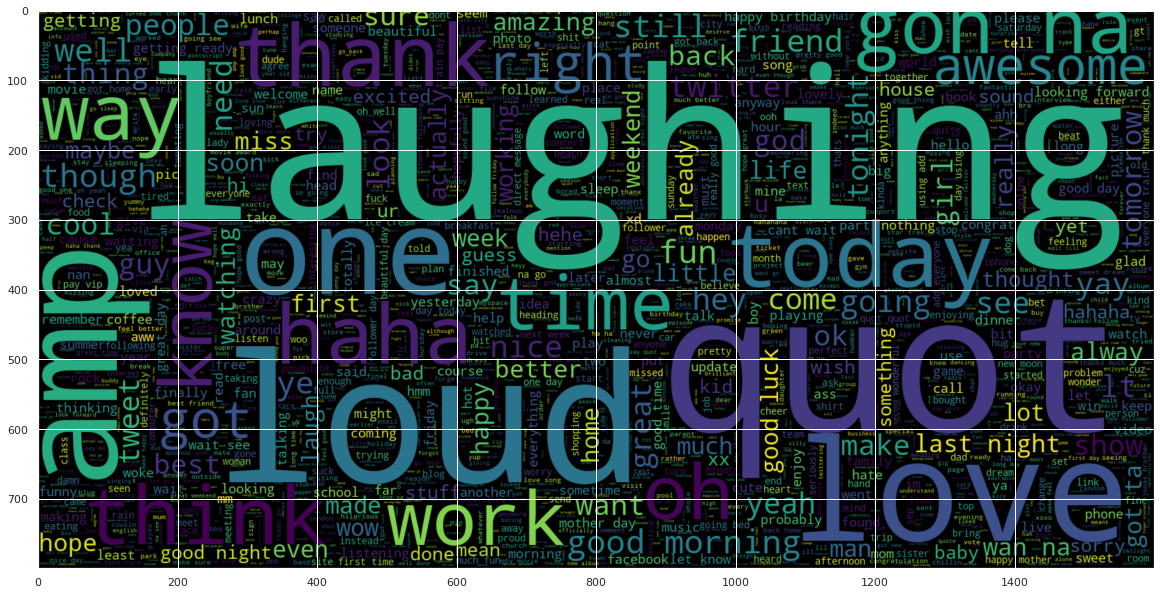

In [58]:
from wordcloud import WordCloud

# Word Cloud for Positive Sentiment Tweet
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , 
               width = 1600 , 
               height = 800).generate(" ".join(data[data.sentiment == 1].clean_tweet.astype(str)))
plt.imshow(wc , interpolation = 'bilinear');


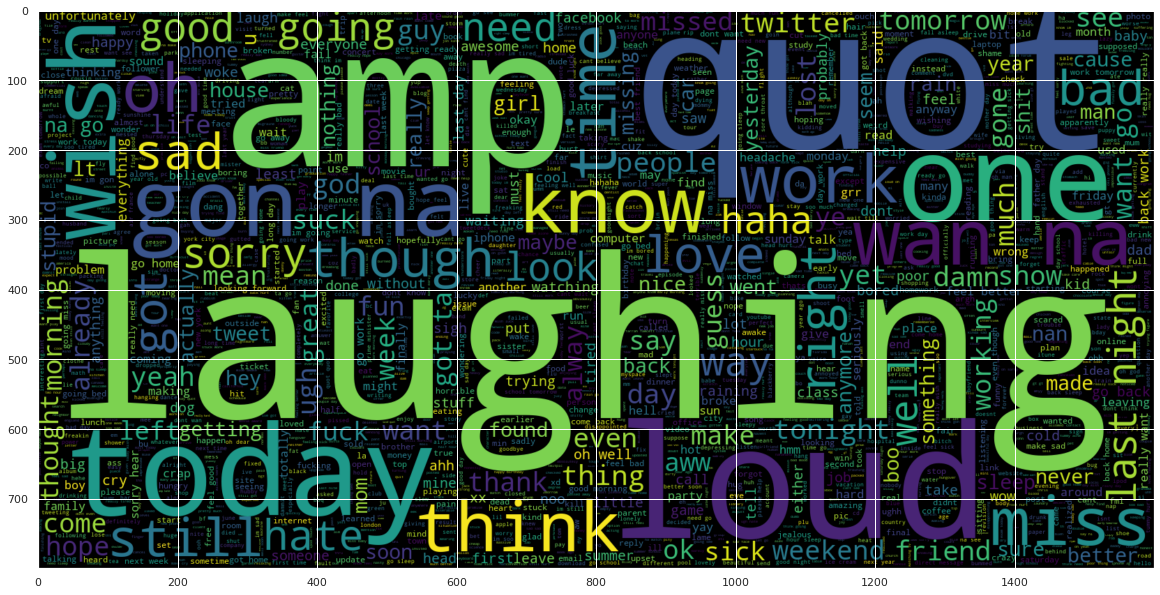

In [56]:
from wordcloud import WordCloud

# Word Cloud for Negative Sentiment Tweet
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , 
               width = 1600 , 
               height = 800).generate(" ".join(data[data.sentiment == 0].clean_tweet.astype(str)))
plt.imshow(wc , interpolation = 'bilinear');


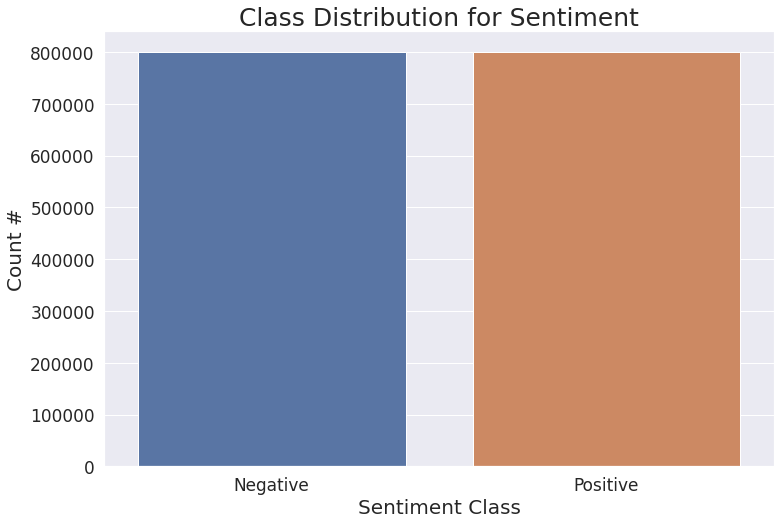

In [66]:
#  Plot the Count of the Sntiment
ax = plt.subplot()
sns.set(rc = {'figure.figsize':(12,8)})
sns.countplot(x='sentiment', data=data, ax=ax)

label_font = {'size':'20'}  # Adjust to fit
ax.set_xlabel('Sentiment Class', fontdict=label_font);
ax.set_ylabel('Count #', fontdict=label_font);

title_font = {'size':'25'}  # Adjust to fit
ax.set_title(f'Class Distribution for Sentiment', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=17)  # Adjust to fit
ax.xaxis.set_ticklabels(['Negative', 'Positive']);
plt.show()

## Baseline ML Models

### Bag of N-Gram 

#### ***Uni-Gram***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import numpy as np

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

BoW = CountVectorizer(stop_words='english',ngram_range = (1,1), 
                      tokenizer = token.tokenize, dtype=np.int8,
                      #max_features=80000, 
                      binary=True
                      )

X_train_BoW = BoW.fit_transform(X_train["clean_tweet"].values.astype('U'))
X_test_BoW = BoW.transform(X_test["clean_tweet"].values.astype('U'))


In [ ]:
# Shape of X_train_BoW and X_test_BoW

X_train_BoW.shape, X_test_BoW.shape

((1280000, 217162), (320000, 217162))

#### ***Bi-Gram***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

BiG = CountVectorizer(stop_words='english',ngram_range = (2,2),
                      tokenizer = token.tokenize, dtype=np.int8,
                      #max_features=80000, 
                      binary=True
                      )

X_train_2G = BiG.fit_transform(X_train["clean_tweet"].values.astype('U'))
X_test_2G = BiG.transform(X_test["clean_tweet"].values.astype('U'))


In [ ]:
# Shape of X_train_2G and X_test_2G

X_train_2G.shape, X_test_2G.shape

((1280000, 3016227), (320000, 3016227))

#### ***Tri-Gram***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

TriG = CountVectorizer(stop_words='english',ngram_range = (3,3),
                       tokenizer = token.tokenize, dtype=np.int8,
                      #max_features=80000, 
                       binary=True
                       )

X_train_3G = TriG.fit_transform(X_train["clean_tweet"].values.astype('U'))
X_test_3G = TriG.transform(X_test["clean_tweet"].values.astype('U'))

In [ ]:
# Shape of X_train_3G and X_test_3G

X_train_3G.shape, X_test_3G.shape

((1280000, 4863525), (320000, 4863525))

#### ***Uni-Gram + Bi-Gram***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

Uni_Bi_G = CountVectorizer(stop_words='english',ngram_range = (1,2),
                           tokenizer = token.tokenize, dtype=np.int8,
                           max_features=200000, binary=True
                           )

X_train_12G = Uni_Bi_G.fit_transform(X_train["clean_tweet"].values.astype('U'))
X_test_12G = Uni_Bi_G.transform(X_test["clean_tweet"].values.astype('U'))

In [ ]:
# Shape of X_train_23G and X_test_23G

X_train_12G.shape, X_test_12G.shape

((1280000, 200000), (320000, 200000))

### Training Function

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.2 MB/s 


In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import confusion_matrix, classification_report

def train(model, model_params, X, y, cv_splits, params_n_iter):

  # Initialize cross-validator 
  kfold_cv = KFold(n_splits=cv_splits, shuffle=True, random_state=47)

  # Initialize the Bayesian Optimizer
  opt = BayesSearchCV(estimator = model, search_spaces = model_params,
                      optimizer_kwargs={'base_estimator': 'GP'}, 
                      n_iter=params_n_iter, 
                      scoring='accuracy', fit_params=None, #n_jobs=-1,
                      n_points=1, refit=True, cv=kfold_cv, verbose=0, pre_dispatch='2*n_jobs',
                      random_state=0, error_score='raise',  return_train_score=True )
  
  # Fit the training data
  opt.fit(X, y)

  # Save the results
  results = pd.DataFrame(opt.cv_results_)

  return opt, results

### Generate Report Function

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def report(clf, X_test, y_test, title):

  y_pred = clf.predict(X_test)

  # Classification Report
  print("#"*100)
  print(f'\tTest Accuracy for {title}:', accuracy_score(y_test, y_pred))
  print("#"*100)
  
  print()

  print("#"*100)
  # Classification Report
  print(f'\tClassification Report for {title}:\n\n',
        classification_report(y_test, y_pred, 
        target_names=['Negative', 'Positive']))
  print("#"*100)

  print()

  print("#"*100)
  # AUC Score
  print(f"AUC Score for {title}: ", 
        roc_auc_score(y_test, y_pred).round(2))
  print("#"*100)

  print()
  
  print("#"*100)
  print(f"Confusion Matrix: ")
  print()
  # Plot Confusion Matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
                  
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = plt.subplot()
  sns.set(rc = {'figure.figsize':(12,8)})
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', 
              linewidths=3, linecolor='black', ax=ax, annot_kws={"fontsize":20} )

  # Labels, title and ticks
  label_font = {'size':'20'}  # Adjust to fit
  ax.set_xlabel('Predicted labels', fontdict=label_font);
  ax.set_ylabel('Observed labels', fontdict=label_font);

  title_font = {'size':'25'}  # Adjust to fit
  ax.set_title(f'{title} Confusion Matrix', fontdict=title_font);

  ax.tick_params(axis='both', which='major', labelsize=17)  # Adjust to fit
  ax.xaxis.set_ticklabels(['Negative', 'Positive']);
  ax.yaxis.set_ticklabels(['Negative', 'Positive']);
  plt.show()
  print("#"*100)

### Naive Bayes Classifier

#### Using Uni-Gram

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Naive Bayes Classifier
CNB = ComplementNB()

# Parameter search space
params = {
    "alpha" : Real(1e-6, 1e+6, prior='log-uniform'),
    "fit_prior" : Categorical([True, False]),
    "norm" : Categorical([True, False])
}


BoW_NB_opt, BoW_NB_results = train(CNB, params, X_train_BoW, y_train, 5, 50)

####################################################################################################
	Test Accuracy for Naive Bayes with Uni-gram: 0.765353125
####################################################################################################

####################################################################################################
	Classification Report for Naive Bayes with Uni-gram:

               precision    recall  f1-score   support

    Negative       0.76      0.77      0.77    160259
    Positive       0.77      0.76      0.76    159741

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

####################################################################################################

####################################################################################################
AUC Score for Naive Bayes with Uni-gram:  0.77
#####

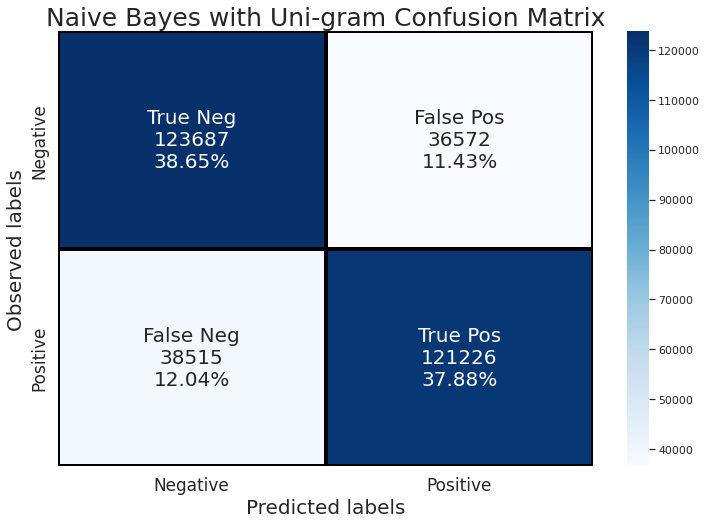

####################################################################################################


In [ ]:
# Generate Report
title = "Naive Bayes with Uni-gram"
report(BoW_NB_opt.best_estimator_, X_test_BoW, y_test, title)

#### Using Bi-Gram 

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Naive Bayes Classifier
CNB = ComplementNB()

# Parameter search space
params = {
    "alpha" : Real(1e-6, 1e+6, prior='log-uniform'),
    "fit_prior" : Categorical([True, False]),
    "norm" : Categorical([True, False])
}


BiG_NB_opt, BiG_NB_results = train(CNB, params, X_train_2G, y_train, 5, 50)

####################################################################################################
	Test Accuracy for Naive Bayes with Bi-gram: 0.710428125
####################################################################################################

####################################################################################################
	Classification Report for Naive Bayes with Bi-gram:

               precision    recall  f1-score   support

    Negative       0.69      0.77      0.73    160259
    Positive       0.74      0.65      0.69    159741

    accuracy                           0.71    320000
   macro avg       0.71      0.71      0.71    320000
weighted avg       0.71      0.71      0.71    320000

####################################################################################################

####################################################################################################
AUC Score for Naive Bayes with Bi-gram:  0.71
########

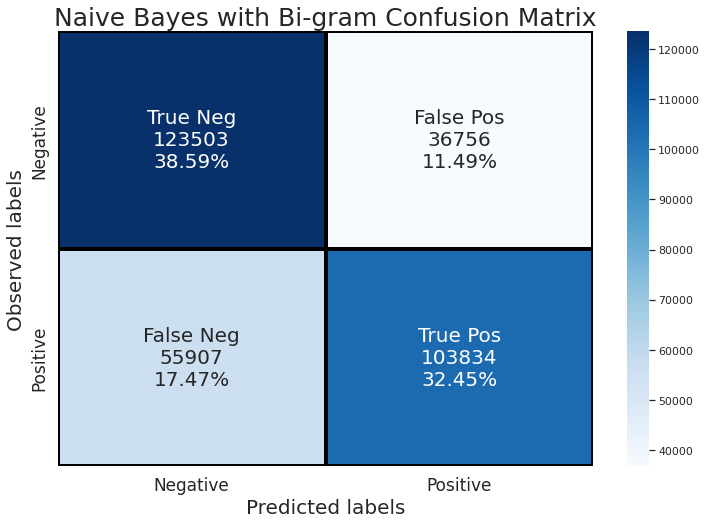

####################################################################################################


In [ ]:
# Generate Report
title = "Naive Bayes with Bi-gram"
report(BiG_NB_opt.best_estimator_, X_test_2G, y_test, title)

#### Using Tri-gram

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Naive Bayes Classifier
CNB = ComplementNB()

# Parameter search space
params = {
    "alpha" : Real(1e-6, 1e+6, prior='log-uniform'),
    "fit_prior" : Categorical([True, False]),
    "norm" : Categorical([True, False])
}


TriG_NB_opt, TriG_NB_results = train(CNB, params, X_train_3G, y_train, 5, 50)

####################################################################################################
	Test Accuracy for Naive Bayes with Tri-gram: 0.5759875
####################################################################################################

####################################################################################################
	Classification Report for Naive Bayes with Tri-gram:

               precision    recall  f1-score   support

    Negative       0.55      0.88      0.67    160259
    Positive       0.69      0.27      0.39    159741

    accuracy                           0.58    320000
   macro avg       0.62      0.58      0.53    320000
weighted avg       0.62      0.58      0.53    320000

####################################################################################################

####################################################################################################
AUC Score for Naive Bayes with Tri-gram:  0.58
#######

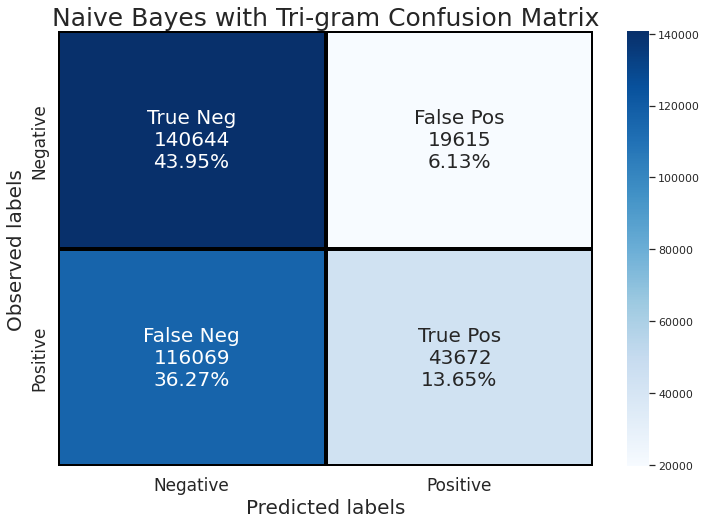

####################################################################################################


In [ ]:
# Generate Report
title = "Naive Bayes with Tri-gram"
report(TriG_NB_opt.best_estimator_, X_test_3G, y_test, title)

#### Using Uni-gram + Bi-gram

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Naive Bayes Classifier
CNB = ComplementNB()

# Parameter search space
params = {
    "alpha" : Real(1e-6, 1e+6, prior='log-uniform'),
    "fit_prior" : Categorical([True, False]),
    "norm" : Categorical([True, False])
}

UniBiG_NB_opt, UniBiG_NB_results = train(CNB, params, X_train_12G, y_train, 5, 50)

####################################################################################################
	Test Accuracy for Naive Bayes with Uni-gram + Bi-gram: 0.770103125
####################################################################################################

####################################################################################################
	Classification Report for Naive Bayes with Uni-gram + Bi-gram:

               precision    recall  f1-score   support

    Negative       0.77      0.77      0.77    160259
    Positive       0.77      0.77      0.77    159741

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

####################################################################################################

####################################################################################################
AUC Score for Naive Bayes with U

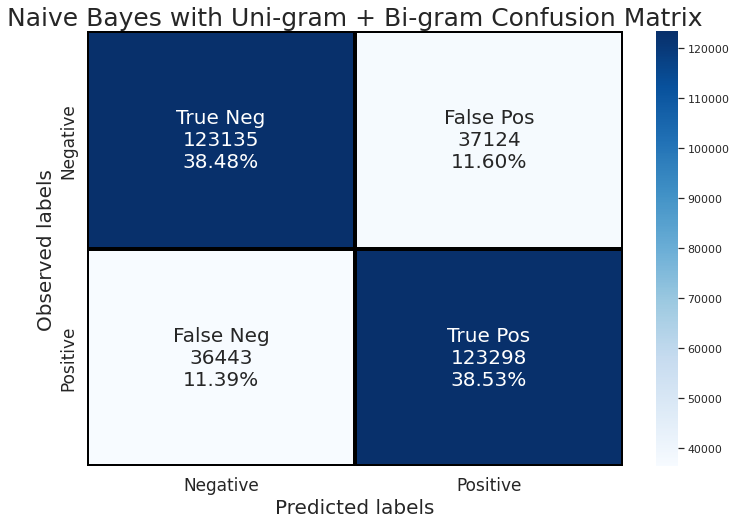

####################################################################################################


In [ ]:
# Generate Report
title = "Naive Bayes with Uni-gram + Bi-gram"
report(UniBiG_NB_opt.best_estimator_, X_test_12G, y_test, title)

### Logistic Regression

#### Using Uni-Gram

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression Pipeline
pipe_1G = Pipeline([('scl', Normalizer()), 
                ('model', LogisticRegression(penalty='l2',
                                             C=10,
                                             max_iter=100,
                                             solver='saga',
                                             #l1_ratio=0.3,
                                             n_jobs=-1))])

pipe_1G.fit(X_train_BoW, y_train)

Pipeline(steps=[('scl', Normalizer()),
                ('model', LogisticRegression(C=10, n_jobs=-1, solver='saga'))])

####################################################################################################
	Test Accuracy for Logistic Regression with Uni-gram: 0.771671875
####################################################################################################

####################################################################################################
	Classification Report for Logistic Regression with Uni-gram:

               precision    recall  f1-score   support

    Negative       0.78      0.76      0.77    160259
    Positive       0.76      0.79      0.77    159741

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

####################################################################################################

####################################################################################################
AUC Score for Logistic Regression wi

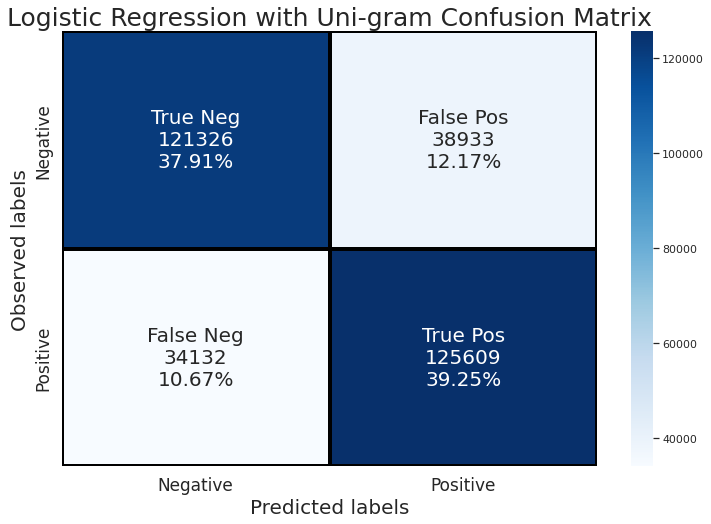

####################################################################################################


In [ ]:
# Generate Report
title = "Logistic Regression with Uni-gram"
report(pipe_1G, X_test_BoW, y_test, title)

#### Using Bi-Gram 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression Pipeline
pipe_2G = Pipeline([('scl', Normalizer()), 
                ('model', LogisticRegression(penalty='l2',
                                             C=1,
                                             max_iter=100,
                                             solver='saga',
                                             #l1_ratio=0.3,
                                             n_jobs=-1))])

pipe_2G.fit(X_train_2G, y_train)


Pipeline(steps=[('scl', Normalizer()),
                ('model', LogisticRegression(C=1, n_jobs=-1, solver='saga'))])

####################################################################################################
	Test Accuracy for Logistic Regression with Bi-gram: 0.712290625
####################################################################################################

####################################################################################################
	Classification Report for Logistic Regression with Bi-gram:

               precision    recall  f1-score   support

    Negative       0.75      0.64      0.69    160259
    Positive       0.68      0.79      0.73    159741

    accuracy                           0.71    320000
   macro avg       0.72      0.71      0.71    320000
weighted avg       0.72      0.71      0.71    320000

####################################################################################################

####################################################################################################
AUC Score for Logistic Regression with

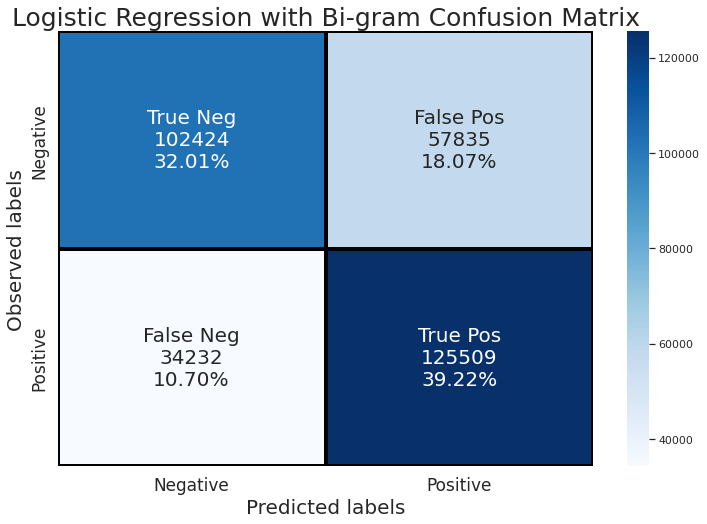

####################################################################################################


In [ ]:
# Generate Report
title = "Logistic Regression with Bi-gram"
report(pipe_2G, X_test_2G, y_test, title)

#### Using Tri-Gram 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression Pipeline
pipe_3G = Pipeline([('scl', Normalizer()), 
                ('model', LogisticRegression(penalty='l2',
                                             C=1,
                                             max_iter=100,
                                             solver='saga',
                                             #l1_ratio=0.3,
                                             n_jobs=-1))])

pipe_3G.fit(X_train_3G, y_train)


Pipeline(steps=[('scl', Normalizer()),
                ('model', LogisticRegression(C=1, n_jobs=-1, solver='saga'))])

####################################################################################################
	Test Accuracy for Logistic Regression with Tri-gram: 0.57500625
####################################################################################################

####################################################################################################
	Classification Report for Logistic Regression with Tri-gram:

               precision    recall  f1-score   support

    Negative       0.55      0.88      0.68    160259
    Positive       0.70      0.26      0.38    159741

    accuracy                           0.58    320000
   macro avg       0.62      0.57      0.53    320000
weighted avg       0.62      0.58      0.53    320000

####################################################################################################

####################################################################################################
AUC Score for Logistic Regression wit

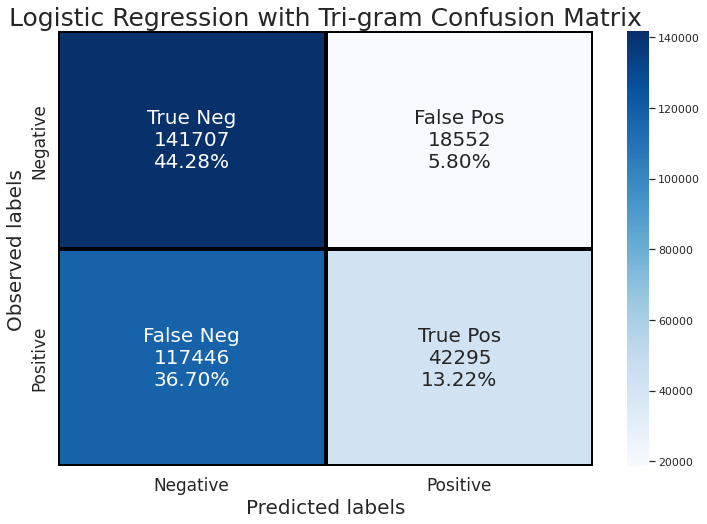

####################################################################################################


In [ ]:
# Generate Report
title = "Logistic Regression with Tri-gram"
report(pipe_3G, X_test_3G, y_test, title)

#### Using Uni-Gram + Bi-Gram

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression Pipeline
pipe_12G = Pipeline([('scl', Normalizer()), 
                ('model', LogisticRegression(penalty='l2',
                                             C=1,
                                             max_iter=100,
                                             solver='saga',
                                             #l1_ratio=0.3,
                                             n_jobs=-1))])

pipe_12G.fit(X_train_12G, y_train)


Pipeline(steps=[('scl', Normalizer()),
                ('model', LogisticRegression(C=1, n_jobs=-1, solver='saga'))])

####################################################################################################
	Test Accuracy for Logistic Regression with Uni-Gram + Bi-Gram: 0.7821625
####################################################################################################

####################################################################################################
	Classification Report for Logistic Regression with Uni-Gram + Bi-Gram:

               precision    recall  f1-score   support

    Negative       0.79      0.76      0.78    160259
    Positive       0.77      0.80      0.79    159741

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

####################################################################################################

####################################################################################################
AUC Score for Logi

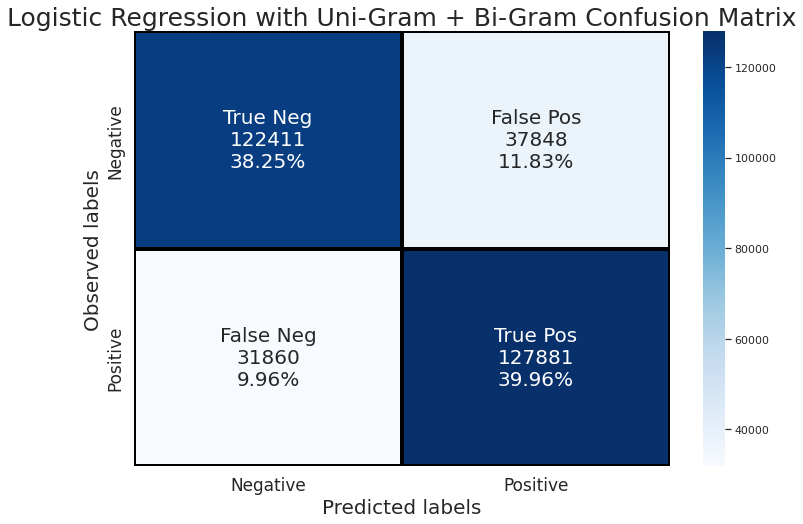

####################################################################################################


In [ ]:
# Generate Report
title = "Logistic Regression with Uni-Gram + Bi-Gram"
report(pipe_12G, X_test_12G, y_test, title)

### LinearSVC

#### Using Uni-Gram

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Linear SVM Pipeline
pipe_svm_1G = Pipeline([('scl', Normalizer()), 
                ('model', LinearSVC(penalty='l2',
                                    loss='squared_hinge',
                                    C=10.0,
                                    max_iter=1000,))])

pipe_svm_1G.fit(X_train_BoW, y_train)


Pipeline(steps=[('scl', Normalizer()), ('model', LinearSVC(C=10.0))])

####################################################################################################
	Test Accuracy for Linear SVM with Uni-Gram: 0.76450625
####################################################################################################

####################################################################################################
	Classification Report for Linear SVM with Uni-Gram:

               precision    recall  f1-score   support

    Negative       0.77      0.75      0.76    160259
    Positive       0.76      0.78      0.77    159741

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

####################################################################################################

####################################################################################################
AUC Score for Linear SVM with Uni-Gram:  0.76
#########

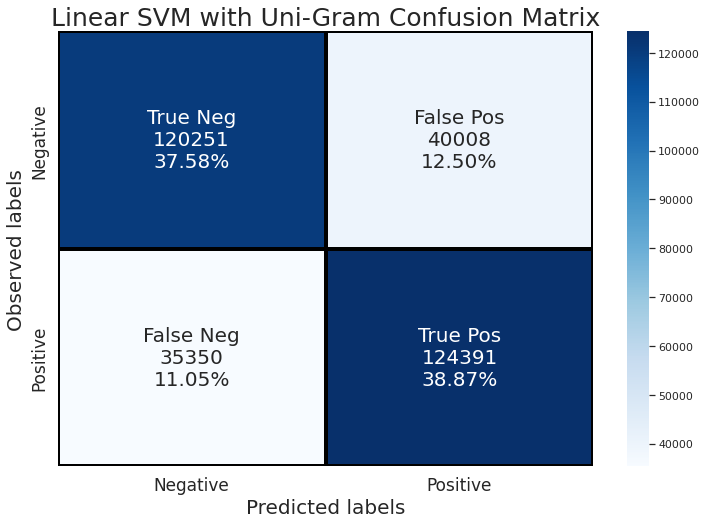

####################################################################################################


In [ ]:
# Generate Report
title = "Linear SVM with Uni-Gram"
report(pipe_svm_1G, X_test_BoW, y_test, title)

#### Using Bi-Gram

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Linear SVM Pipeline
pipe_svm_2G = Pipeline([('scl', Normalizer()), 
                ('model', LinearSVC(penalty='l2',
                                    loss='hinge',
                                    C=1.0,
                                    max_iter=1000,))])

pipe_svm_2G.fit(X_train_2G, y_train)


Pipeline(steps=[('scl', Normalizer()), ('model', LinearSVC(loss='hinge'))])

####################################################################################################
	Test Accuracy for Linear SVM with Bi-Gram: 0.711971875
####################################################################################################

####################################################################################################
	Classification Report for Linear SVM with Bi-Gram:

               precision    recall  f1-score   support

    Negative       0.75      0.64      0.69    160259
    Positive       0.68      0.79      0.73    159741

    accuracy                           0.71    320000
   macro avg       0.72      0.71      0.71    320000
weighted avg       0.72      0.71      0.71    320000

####################################################################################################

####################################################################################################
AUC Score for Linear SVM with Bi-Gram:  0.71
###########

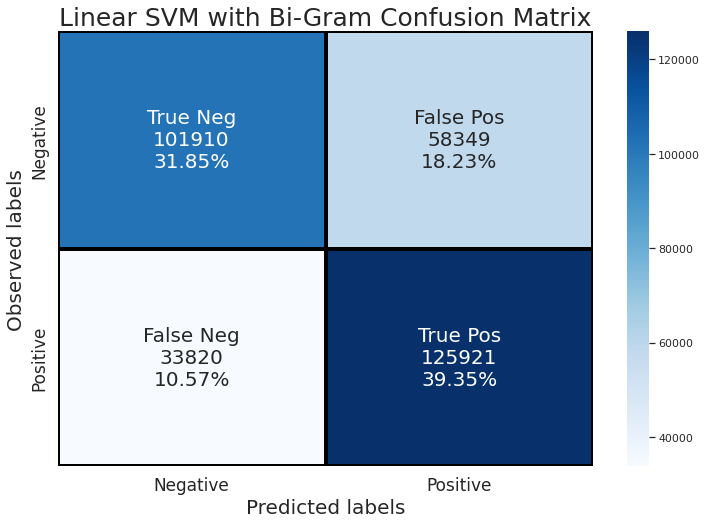

####################################################################################################


In [ ]:
# Generate Report
title = "Linear SVM with Bi-Gram"
report(pipe_svm_2G, X_test_2G, y_test, title)

#### Using Tri-Gram

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Linear SVM Pipeline
pipe_svm_3G = Pipeline([('scl', Normalizer()), 
                ('model', LinearSVC(penalty='l2',
                                    loss='hinge',
                                    C=1.0,
                                    max_iter=1000,))])

pipe_svm_3G.fit(X_train_3G, y_train)


Pipeline(steps=[('scl', Normalizer()), ('model', LinearSVC(loss='hinge'))])

####################################################################################################
	Test Accuracy for Linear SVM with Tri-Gram: 0.579059375
####################################################################################################

####################################################################################################
	Classification Report for Linear SVM with Tri-Gram:

               precision    recall  f1-score   support

    Negative       0.72      0.26      0.38    160259
    Positive       0.55      0.90      0.68    159741

    accuracy                           0.58    320000
   macro avg       0.63      0.58      0.53    320000
weighted avg       0.63      0.58      0.53    320000

####################################################################################################

####################################################################################################
AUC Score for Linear SVM with Tri-Gram:  0.58
########

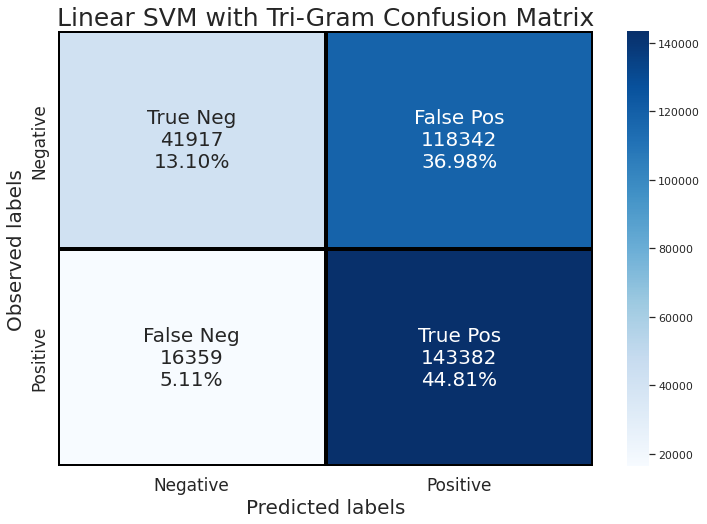

####################################################################################################


In [ ]:
# Generate Report
title = "Linear SVM with Tri-Gram"
report(pipe_svm_3G, X_test_3G, y_test, title)

#### Using Uni-Gram + Bi-Gram

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Linear SVM Pipeline
pipe_svm_12G = Pipeline([('scl', Normalizer()), 
                ('model', LinearSVC(penalty='l2',
                                    loss='hinge',
                                    C=1.0,
                                    max_iter=1000,))])

pipe_svm_12G.fit(X_train_12G, y_train)


Pipeline(steps=[('scl', Normalizer()), ('model', LinearSVC(loss='hinge'))])

####################################################################################################
	Test Accuracy for Linear SVM with Uni-Gram + Bi-Gram: 0.7815375
####################################################################################################

####################################################################################################
	Classification Report for Linear SVM with Uni-Gram + Bi-Gram:

               precision    recall  f1-score   support

    Negative       0.80      0.76      0.78    160259
    Positive       0.77      0.81      0.79    159741

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

####################################################################################################

####################################################################################################
AUC Score for Linear SVM with Uni-Gr

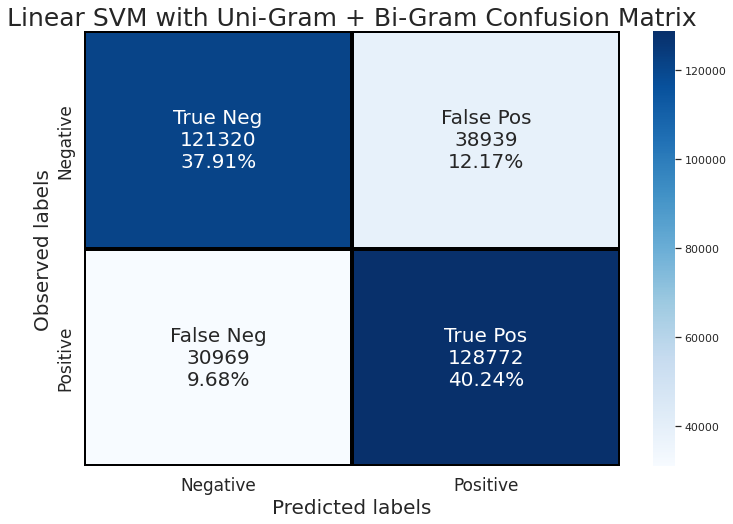

####################################################################################################


In [ ]:
# Generate Report
title = "Linear SVM with Uni-Gram + Bi-Gram"
report(pipe_svm_12G, X_test_12G, y_test, title)

## Deep Learning Models

### Vectorization/Word Embeddings

#### Tokenization and Padding for Vector Embedding



In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Fit your tokenizer on the training cleaned tweets
num_words = None
oov_token = '<UNK>'
pad_type = 'pre'
trunc_type = 'pre'

# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(X_train["clean_tweet"].astype('U').values.tolist())

# Get the training data word index
word_index = tokenizer.word_index
# Get the vocabulary words in our training data 
vocab_size = len(word_index) + 1

# Encode training data tweets into sequences
train_sequences = tokenizer.texts_to_sequences(X_train["clean_tweet"].astype('U').values.tolist())

# Encode test data tweets into sequences
test_sequences = tokenizer.texts_to_sequences(X_test["clean_tweet"].astype('U').values.tolist())


In [11]:
# Maximum length
maxlen = len(max(train_sequences+test_sequences, key = lambda i: len(i))) #200

# Pad the training tweets sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

# Pad the test tweets sequences
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

In [12]:
# Size of the Padded Training set
train_padded.shape

(1280000, 69)

In [13]:
# Size of Vocabulary
vocab_size

221099

In [14]:
# Check the max length of the cleaned tweet
lengths = X_train.clean_tweet.str.len()
argmax = np.where(lengths == lengths.max())[0]
X_train.clean_tweet.iloc[argmax].values

array(['get day lt i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you'],
      dtype=object)

In [15]:
# Check the max length of the tokenized training+testing set
len(max(train_sequences+test_sequences, key = lambda i: len(i)))

69

#### Word2Vec

In [16]:
from nltk.tokenize import RegexpTokenizer
from gensim.models import Word2Vec

In [18]:
w2v_file_path = "/content/drive/MyDrive/NLP Project/word2vec.model"

# Initialze the Word2Vec
W2V_SIZE = 300 # len(max(train_sequences+test_sequences, key = lambda i: len(i)))
W2V_WINDOW = 7
W2V_MIN_COUNT = 10

if not os.path.exists(w2v_file_path):
  
  print("The Word2Vec Vector Embedding is not saved....\nTraining the Word2Vec on the training data...\n")
  # Tokenize the train and test set
  token = RegexpTokenizer(r'[a-zA-Z0-9]+')
  X_train_tokenized = X_train['clean_tweet'].astype('U').apply(lambda x: token.tokenize(x))
  X_test_tokenized = X_test['clean_tweet'].astype('U').apply(lambda x: token.tokenize(x))

  word2vec = Word2Vec(sentences=X_train_tokenized,
                      vector_size=W2V_SIZE,
                      window=W2V_WINDOW,
                      min_count=W2V_MIN_COUNT, workers=32)
  
  # Build the Word2Vec Vocabulary 
  word2vec.build_vocab(X_train_tokenized)

  # Generate the vector embedding using the trained Word2Vec
  w2v_embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
  for word, index in tokenizer.word_index.items():
    if index < vocab_size: # since index starts with zero 
      if word in word2vec.wv.key_to_index:
          w2v_embedding_matrix[index] = word2vec.wv[word]

  # Save the Word2Vec Vector Embedding for the training data set    
  word2vec.save(w2v_file_path)

else:

  print("The Word2Vec Vector Embedding is saved....\nLoading Vector Embedding....\n")
  # Load the saved W2V Array
  word2vec = Word2Vec.load(w2v_file_path)

  # Generate the vector embedding using the trained Word2Vec
  w2v_embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
  for word, index in tokenizer.word_index.items():
    if index < vocab_size: # since index starts with zero 
      if word in word2vec.wv.key_to_index:
          w2v_embedding_matrix[index] = word2vec.wv[word]
          

The Word2Vec Vector Embedding is saved....
Loading Vector Embedding....



In [19]:
w2v_embedding_matrix.shape

(221099, 300)

#### Global Vectors (GloVe)

##### ***GloVe which can be used for Deep Learning Models***

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [ ]:
GLOVE_EMB = '/content/drive/MyDrive/NLP Project/glove.6B.300d.txt'
EMBEDDING_DIM = 300

# Get the Embedding Index
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

# Generate Embedding Vectors

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector



In [ ]:
embedding_matrix.shape

(221099, 300)

### Report Generation Function

In [27]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def deep_learning_report(y_test, y_pred, title, history=None):

  # Classification Report
  print("#"*100)
  print(f'\tClassification Report for {title}:\n\n',
        classification_report(y_test, y_pred, 
        target_names=['Negative', 'Positive']))
  print("#"*100)

  print()

  # AUC Score
  print("#"*100)
  print(f"AUC Score for {title}: ", 
        roc_auc_score(y_test, y_pred).round(2))
  print("#"*100)

  print()

  # F1 Score
  print("#"*100)
  print(f"F1 Score for {title}: ", 
        f1_score(y_test, y_pred, average='weighted').round(2))
  print("#"*100)

  print()

  print(f"Confusion Matrix: ")
  print("#"*100)
  print()
  # Plot Confusion Matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
                  
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = plt.subplot()
  sns.set(rc = {'figure.figsize':(12,8)})
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', 
              linewidths=3, linecolor='black', ax=ax, annot_kws={"fontsize":20} )

  # Labels, title and ticks
  label_font = {'size':'20'}  # Adjust to fit
  ax.set_xlabel('Predicted labels', fontdict=label_font);
  ax.set_ylabel('Observed labels', fontdict=label_font);

  title_font = {'size':'25'}  # Adjust to fit
  ax.set_title(f'{title} Confusion Matrix', fontdict=title_font);

  ax.tick_params(axis='both', which='major', labelsize=17)  # Adjust to fit
  ax.xaxis.set_ticklabels(['Negative', 'Positive']);
  ax.yaxis.set_ticklabels(['Negative', 'Positive']);
  plt.show()
  print("#"*100)

  # Print history of the model trained
  if history is not None:
    print()
    print("#"*100)
    ####################################
    # PLOT :                           #
    # train loss vs val loss           #
    # train auc vs val auc             #
    # train recall vs val recall       #
    # train precision vs val precision #
    # train accuracy vs val accuracy   #
    ####################################
    plt.figure(figsize=(19, 10))
    plt.subplot(2,3,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model Loss")
    plt.xlabel('Number of epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])

    plt.subplot(2,3,2)
    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Number of epochs')
    plt.legend(['Training AUC', 'Validation AUC'])

    plt.subplot(2,3,3)
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('Number of epochs')
    plt.legend(['Training Recall', 'Validation Recall'])

    plt.subplot(2,3,4)
    plt.plot(history.history['precision'])
    plt.plot(history.history['val_precision'])
    plt.title("Model Precision")
    plt.xlabel('Number of epochs')
    plt.ylabel('Precision')
    plt.legend(['Training Precision', 'Validation Precision'])

    plt.subplot(2,3,5)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of epochs')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])

    plt.show()



### Bi-directional GRU+LSTM+CNN

In [34]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [35]:
# Define the Bidirectional GRU+LSTM+CNN Model

def build_model(input_shape, embedding_matrix, learning_rate, lr_decay, LSTM_units, GRU_units, drp_rate):

  inp = Input(shape = (input_shape,))
  x = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], trainable = False)(inp)
  x1 = SpatialDropout1D(drp_rate)(x)

  x_gru = Bidirectional(CuDNNGRU(GRU_units, return_sequences = True))(x1)
  x1 = Conv1D(32, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(x_gru)
  avg_pool1_gru = GlobalAveragePooling1D()(x1)
  max_pool1_gru = GlobalMaxPooling1D()(x1)
  
  x3 = Conv1D(32, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x_gru)
  avg_pool3_gru = GlobalAveragePooling1D()(x3)
  max_pool3_gru = GlobalMaxPooling1D()(x3)
  
  x_lstm = Bidirectional(CuDNNLSTM(LSTM_units, return_sequences = True))(x1)
  x1 = Conv1D(32, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(x_lstm)
  avg_pool1_lstm = GlobalAveragePooling1D()(x1)
  max_pool1_lstm = GlobalMaxPooling1D()(x1)
  
  x3 = Conv1D(32, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
  avg_pool3_lstm = GlobalAveragePooling1D()(x3)
  max_pool3_lstm = GlobalMaxPooling1D()(x3)
  
  
  x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru,
                  avg_pool1_lstm, max_pool1_lstm, avg_pool3_lstm, max_pool3_lstm])
  x = BatchNormalization()(x)
  x = Dropout(0.2)(Dense(128,activation='relu') (x))
  x = BatchNormalization()(x)
  x = Dropout(0.2)(Dense(100,activation='relu') (x))
  x = Dense(1, activation = "sigmoid")(x)

  model = Model(inputs = inp, outputs = x)
  model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = learning_rate, decay = lr_decay), 
                metrics = ['accuracy', 'AUC', 'Precision', 'Recall'])

  return model

#### Using GloVe Embedding

In [ ]:
gru_lstm_cnn_model = build_model(maxlen, embedding_matrix, learning_rate=1e-4, 
                                 lr_decay=0, LSTM_units=128, GRU_units=128, drp_rate=0.5)

gru_lstm_cnn_model.summary()

In [ ]:
file_path = "/content/drive/MyDrive/NLP Project/GRU+LSTM+CNN/gru_lstm_cnn_model.hdf5" # Change the save model path if available

if not os.path.exists(file_path):
  print("The Model is not saved....\nTraining the Model on the training data...\n")
  check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                save_best_only = True, mode = "min")

  early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 3)

  history = gru_lstm_cnn_model.fit(train_padded, y_train, batch_size = 128, epochs = 20, validation_split=0.3, 
                          verbose = 1, callbacks = [check_point, early_stop])
  
  y_pred = gru_lstm_cnn_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)

else:
  print("The Model is saved....\nEvaluating Model on Test data...\n")
  # Load the weights of the Model
  gru_lstm_cnn_model.load_weights(file_path)
  # Evaluate the model on test data set
  y_pred = gru_lstm_cnn_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)

The Model is saved....
Evaluating Model on Test data...



####################################################################################################
	Classification Report for Bi-directional GRU+LSTM+CNN Model with GloVe:

               precision    recall  f1-score   support

    Negative       0.79      0.79      0.79    160259
    Positive       0.79      0.79      0.79    159741

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

####################################################################################################

####################################################################################################
AUC Score for Bi-directional GRU+LSTM+CNN Model with GloVe:  0.79
####################################################################################################

####################################################################################################
Confusion Matrix: 



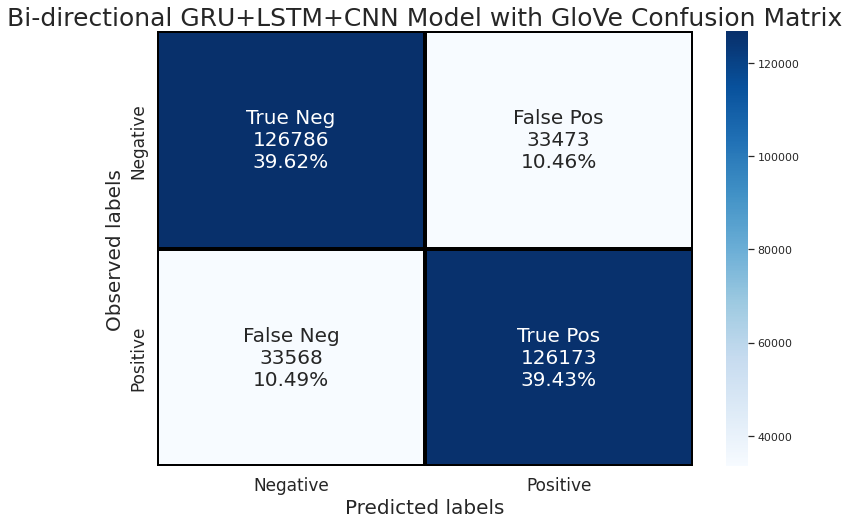

####################################################################################################


In [ ]:
# Generate Report
title="Bi-directional GRU+LSTM+CNN Model with GloVe"
deep_learning_report(y_test, y_pred, title)

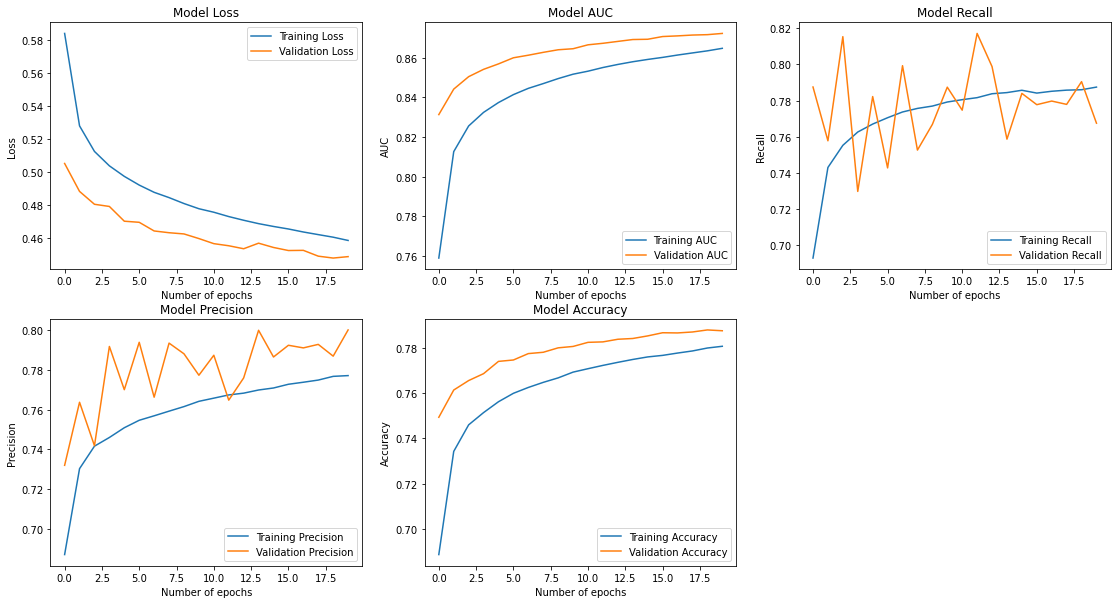

In [ ]:
#@title
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################
import matplotlib.pyplot as plt

plt.figure(figsize=(19, 10))
plt.subplot(2,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])

plt.subplot(2,3,2)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Number of epochs')
plt.legend(['Training AUC', 'Validation AUC'])

plt.subplot(2,3,3)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Number of epochs')
plt.legend(['Training Recall', 'Validation Recall'])

plt.subplot(2,3,4)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title("Model Precision")
plt.xlabel('Number of epochs')
plt.ylabel('Precision')
plt.legend(['Training Precision', 'Validation Precision'])

plt.subplot(2,3,5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

plt.show()

#### Using Word2Vec Embedding

In [36]:
gru_lstm_cnn_w2v_model = build_model(maxlen, w2v_embedding_matrix, learning_rate=1e-3, 
                                 lr_decay=0, LSTM_units=200, GRU_units=200, drp_rate=0.3)

gru_lstm_cnn_w2v_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 69)]         0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 69, 300)      66329700    ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d_1 (SpatialDr  (None, 69, 300)     0           ['embedding_3[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 69, 400)     602400      ['spatial_dropout1d_1[0][0]']

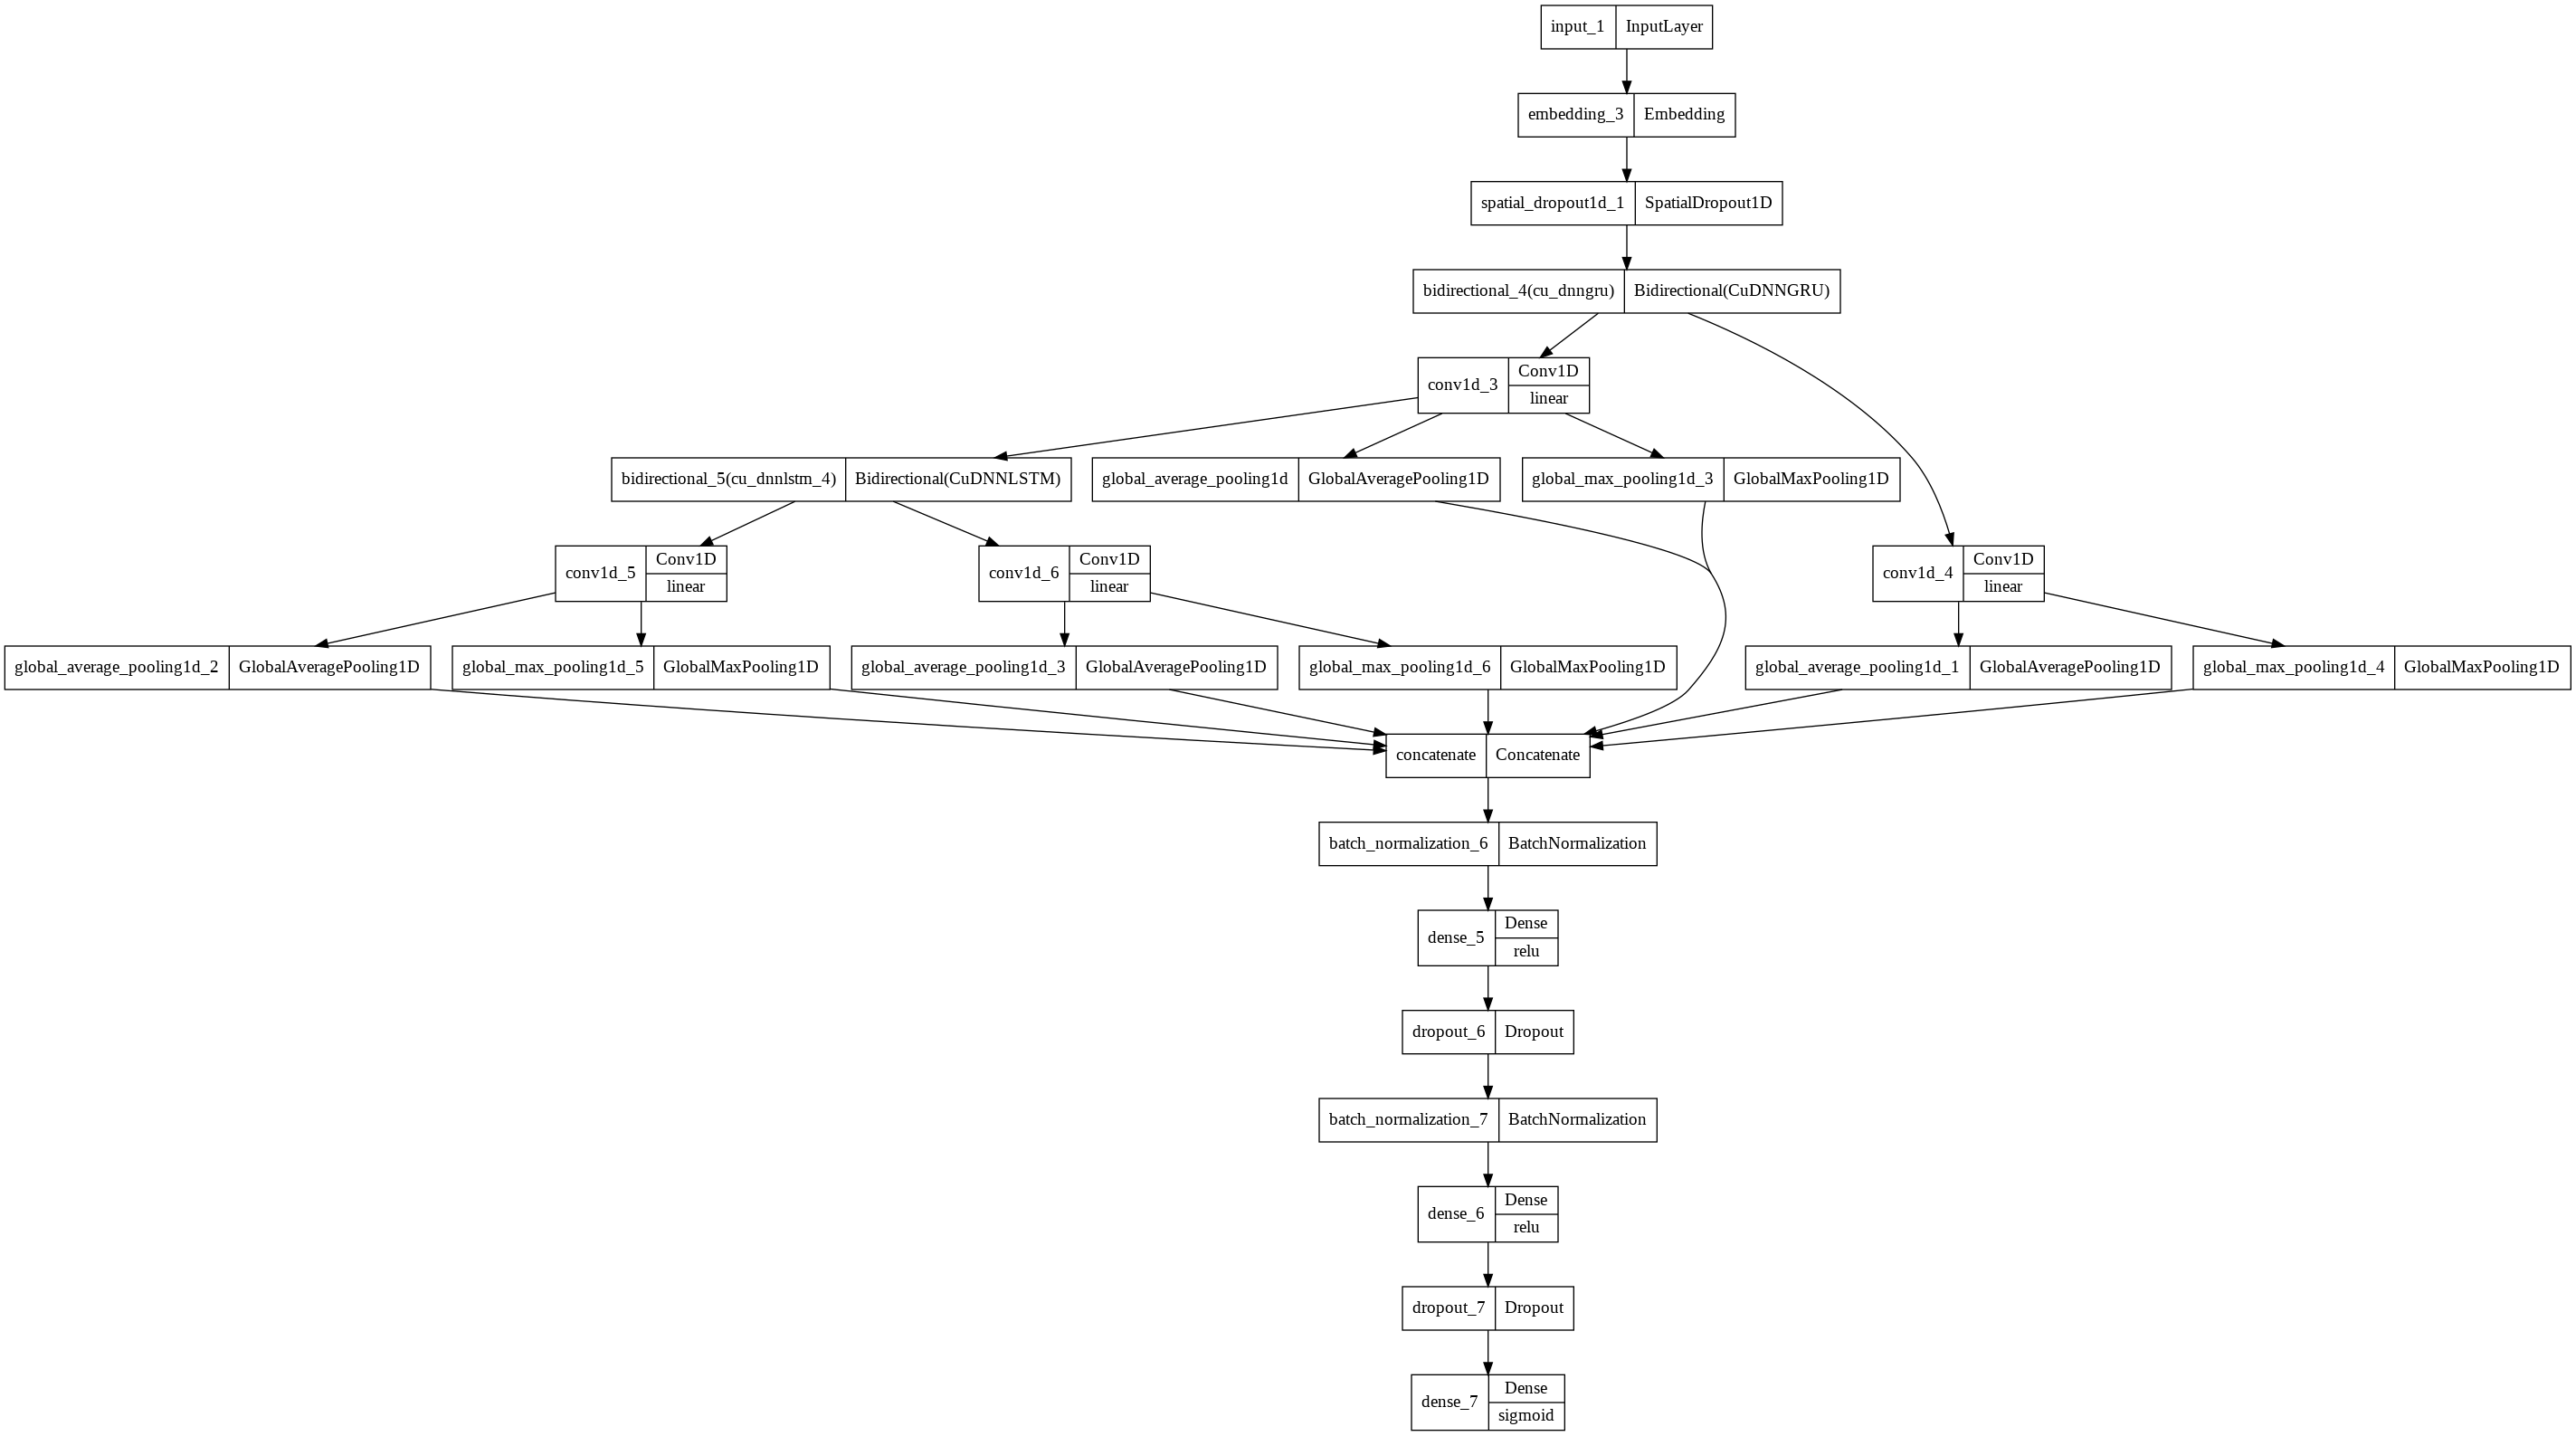

In [48]:
tf.keras.utils.plot_model(gru_lstm_cnn_w2v_model, to_file='/content/drive/MyDrive/NLP Project/gru_lstm_cnn_w2v_model.png',
                          show_layer_activations=True, rankdir='TB') 

In [37]:
file_path = "/content/drive/MyDrive/NLP Project/GRU+LSTM+CNN/gru_lstm_cnn_w2v_model.hdf5" # Change the save model path if available

if not os.path.exists(file_path):
  print("The Model is not saved....\nTraining the Model on the training data...\n")
  check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                save_best_only = True, mode = "min")

  early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 3)

  history = gru_lstm_cnn_w2v_model.fit(train_padded, y_train, batch_size = 256, epochs = 40, validation_split=0.3, 
                          verbose = 1, callbacks = [check_point, early_stop])
  
  y_pred = gru_lstm_cnn_w2v_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)

else:
  print("The Model is saved....\nEvaluating Model on Test data...\n")
  # Load the weights of the Model
  gru_lstm_cnn_w2v_model.load_weights(file_path)
  # Evaluate the model on test data set
  y_pred = gru_lstm_cnn_w2v_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)

The Model is not saved....
Training the Model on the training data...

Epoch 1/40
3500/3500 [==============================] - ETA: 0s - loss: 0.4836 - accuracy: 0.7665 - auc: 0.8479 - precision: 0.7630 - recall: 0.7732
Epoch 1: val_loss improved from inf to 0.45762, saving model to /content/drive/MyDrive/NLP Project/GRU+LSTM+CNN/gru_lstm_cnn_w2v_model.hdf5
3500/3500 [==============================] - 266s 66ms/step - loss: 0.4836 - accuracy: 0.7665 - auc: 0.8479 - precision: 0.7630 - recall: 0.7732 - val_loss: 0.4576 - val_accuracy: 0.7824 - val_auc: 0.8679 - val_precision: 0.7616 - val_recall: 0.8227
Epoch 2/40
3500/3500 [==============================] - ETA: 0s - loss: 0.4580 - accuracy: 0.7824 - auc: 0.8652 - precision: 0.7786 - recall: 0.7893
Epoch 2: val_loss improved from 0.45762 to 0.44507, saving model to /content/drive/MyDrive/NLP Project/GRU+LSTM+CNN/gru_lstm_cnn_w2v_model.hdf5
3500/3500 [==============================] - 230s 66ms/step - loss: 0.4580 - accuracy: 0.7824 - a

####################################################################################################
	Classification Report for Bi-directional GRU+LSTM+CNN Model with Word2Vec:

               precision    recall  f1-score   support

    Negative       0.80      0.79      0.79    160259
    Positive       0.79      0.80      0.80    159741

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

####################################################################################################

####################################################################################################
AUC Score for Bi-directional GRU+LSTM+CNN Model with Word2Vec:  0.8
####################################################################################################

####################################################################################################
F1 Score for Bi-dire

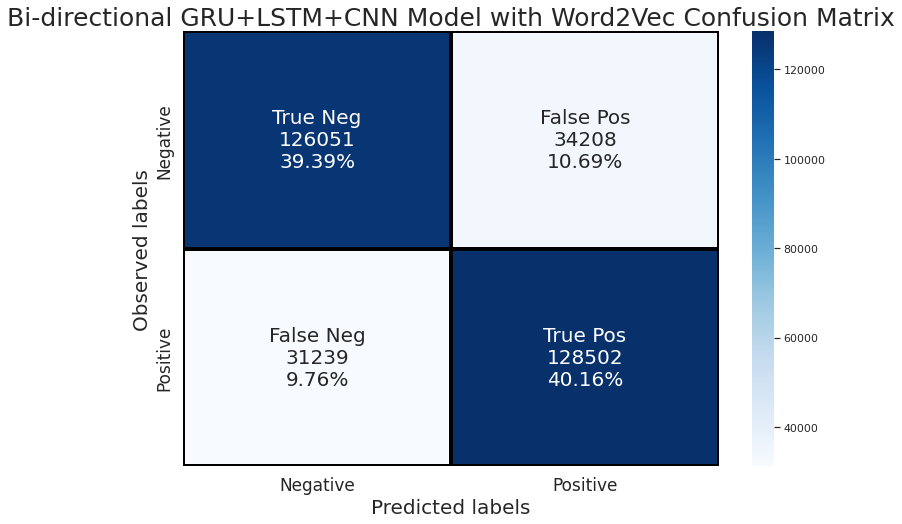

####################################################################################################


In [47]:
# Generate Report
title="Bi-directional GRU+LSTM+CNN Model with Word2Vec"
deep_learning_report(y_test, y_pred, title)

### CNN

In [29]:
from keras.layers import Dense, Input, Embedding, Activation, Conv1D, BatchNormalization, Dropout
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, SpatialDropout1D, Flatten
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [30]:
# Define the CNN Model

def build_cnn_model(input_shape, embedding_matrix, learning_rate, lr_decay, drp_rate):

  model = tf.keras.models.Sequential()

  model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                      output_dim=embedding_matrix.shape[1], 
                      weights = [embedding_matrix], input_length=input_shape, 
                      trainable = False))
  
  model.add(SpatialDropout1D(drp_rate))

  model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(GlobalMaxPooling1D(keepdims=True))

  model.add(Conv1D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(GlobalMaxPooling1D(keepdims=True))

  model.add(Conv1D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Flatten())

  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Dense(128,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1, activation = "sigmoid"))

  model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = learning_rate, decay = lr_decay), 
                metrics = ['accuracy', 'AUC', 'Precision', 'Recall'])

  return model


#### Using GloVe Embedding

In [ ]:
cnn_model = build_cnn_model(maxlen, embedding_matrix, learning_rate=1e-4, 
                        lr_decay=0, drp_rate=0.5)

cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 69, 300)           66329700  
                                                                 
 spatial_dropout1d_11 (Spati  (None, 69, 300)          0         
 alDropout1D)                                                    
                                                                 
 conv1d_28 (Conv1D)          (None, 69, 64)            57664     
                                                                 
 global_max_pooling1d_24 (Gl  (None, 1, 64)            0         
 obalMaxPooling1D)                                               
                                                                 
 conv1d_29 (Conv1D)          (None, 1, 128)            24704     
                                                                 
 global_max_pooling1d_25 (Gl  (None, 1, 128)          

In [ ]:
file_path = "/content/drive/MyDrive/NLP Project/CNN/cnn_model.hdf5" # Change the save model path if available

if not os.path.exists(file_path):
  print("The Model is not saved....\nTraining the Model on the training data...\n")
  check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                save_best_only = True, mode = "min")

  early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, 
                            patience = 3, min_delta=0.005)

  history = cnn_model.fit(train_padded, y_train, batch_size = 128, epochs = 40, validation_split=0.3, 
                          verbose = 1, callbacks = [check_point, early_stop])
  
  y_pred = cnn_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)

else:
  print("The Model is saved....\nEvaluating Model on Test data...\n")
  # Load the weights of the Model
  cnn_model.load_weights(file_path)
  # Evaluate the model on test data set
  y_pred = cnn_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)



The Model is not saved....
Training the Model on the training data...

Epoch 1/40
6996/7000 [============================>.] - ETA: 0s - loss: 0.6080 - accuracy: 0.6638 - auc: 0.7289 - precision: 0.6612 - recall: 0.6721
Epoch 1: val_loss improved from inf to 0.52942, saving model to /content/drive/MyDrive/NLP Project/CNN/cnn_model.hdf5
7000/7000 [==============================] - 62s 9ms/step - loss: 0.6080 - accuracy: 0.6638 - auc: 0.7289 - precision: 0.6612 - recall: 0.6721 - val_loss: 0.5294 - val_accuracy: 0.7326 - val_auc: 0.8112 - val_precision: 0.7160 - val_recall: 0.7719
Epoch 2/40
7000/7000 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.7143 - auc: 0.7897 - precision: 0.7097 - recall: 0.7255
Epoch 2: val_loss improved from 0.52942 to 0.50867, saving model to /content/drive/MyDrive/NLP Project/CNN/cnn_model.hdf5
7000/7000 [==============================] - 61s 9ms/step - loss: 0.5525 - accuracy: 0.7143 - auc: 0.7897 - precision: 0.7097 - recall: 0.7255 

####################################################################################################
	Classification Report for CNN Model with GloVe:

               precision    recall  f1-score   support

    Negative       0.78      0.75      0.76    160259
    Positive       0.76      0.79      0.77    159741

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

####################################################################################################

####################################################################################################
AUC Score for CNN Model with GloVe:  0.77
####################################################################################################

####################################################################################################
F1 Score for CNN Model with GloVe:  0.77
################################

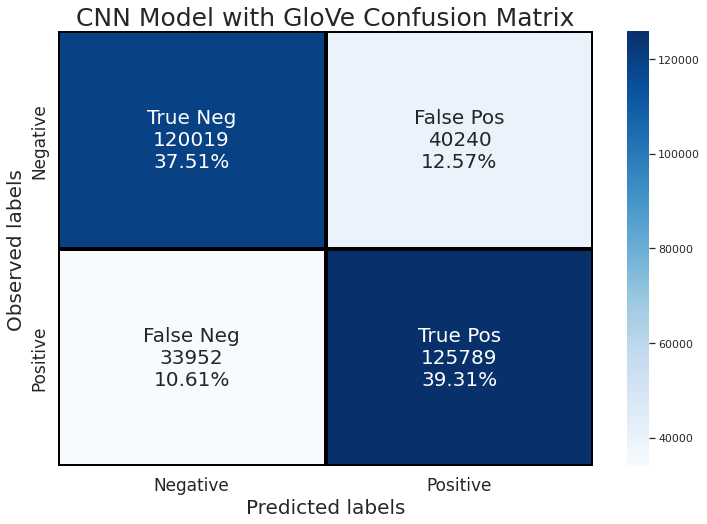

####################################################################################################

####################################################################################################


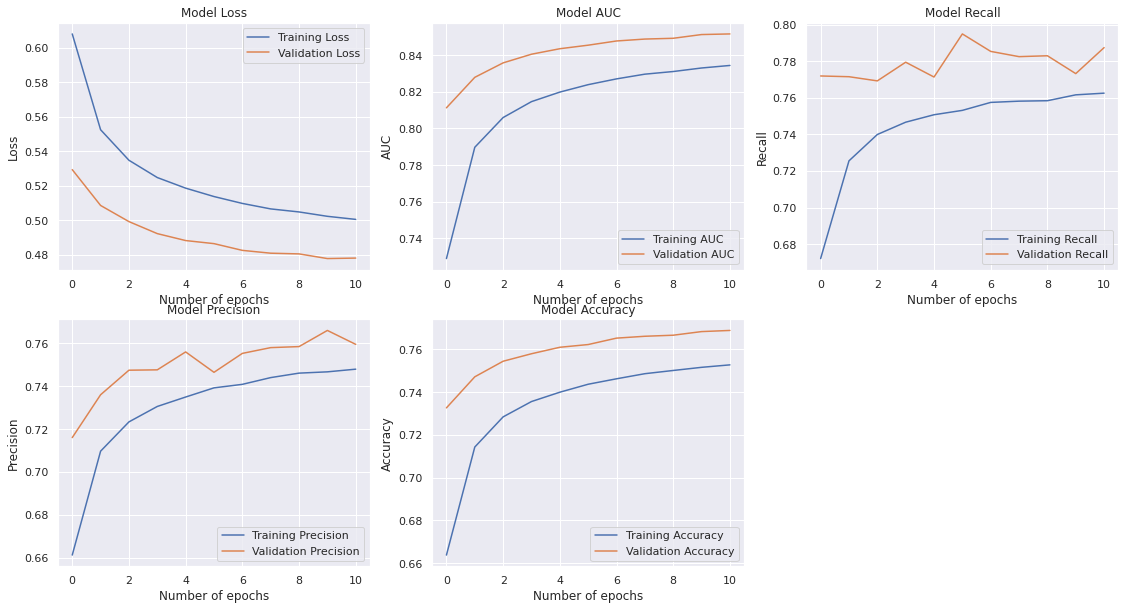

In [ ]:
# Generate Report
title="CNN Model with GloVe"
deep_learning_report(y_test, y_pred, title, history)

#### Using Word2Vec Embedding

In [31]:
cnn_w2v_model = build_cnn_model(maxlen, w2v_embedding_matrix, learning_rate=1e-3, 
                                lr_decay=0, drp_rate=0.5)

cnn_w2v_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 69, 300)           66329700  
                                                                 
 spatial_dropout1d (SpatialD  (None, 69, 300)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 69, 64)            57664     
                                                                 
 global_max_pooling1d (Globa  (None, 1, 64)            0         
 lMaxPooling1D)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            24704     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 1, 128)          

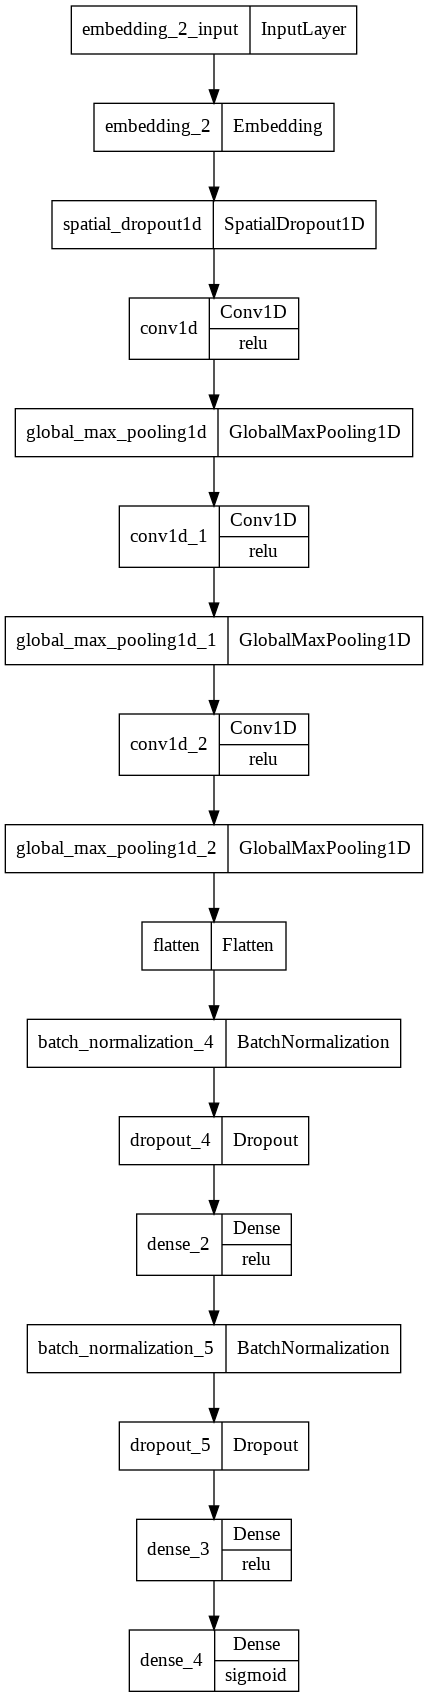

In [51]:
tf.keras.utils.plot_model(cnn_w2v_model, to_file='/content/drive/MyDrive/NLP Project/cnn_w2v_model.png',
                          show_layer_activations=True, rankdir='TB') 

In [32]:
file_path = "/content/drive/MyDrive/NLP Project/CNN/cnn_w2v_model.hdf5" # Change the save model path if available

if not os.path.exists(file_path):
  print("The Model is not saved....\nTraining the Model on the training data...\n")
  check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                save_best_only = True, mode = "min")

  early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, 
                            patience = 3, min_delta=0.005)

  history = cnn_w2v_model.fit(train_padded, y_train, batch_size = 128, epochs = 40, validation_split=0.3, 
                          verbose = 1, callbacks = [check_point, early_stop])
  
  y_pred = cnn_w2v_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)

else:
  print("The Model is saved....\nEvaluating Model on Test data...\n")
  # Load the weights of the Model
  cnn_w2v_model.load_weights(file_path)
  # Evaluate the model on test data set
  y_pred = cnn_w2v_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)


The Model is not saved....
Training the Model on the training data...

Epoch 1/40
6996/7000 [============================>.] - ETA: 0s - loss: 0.5163 - accuracy: 0.7421 - auc: 0.8223 - precision: 0.7387 - recall: 0.7495
Epoch 1: val_loss improved from inf to 0.47627, saving model to /content/drive/MyDrive/NLP Project/CNN/cnn_w2v_model.hdf5
7000/7000 [==============================] - 53s 6ms/step - loss: 0.5163 - accuracy: 0.7421 - auc: 0.8223 - precision: 0.7387 - recall: 0.7495 - val_loss: 0.4763 - val_accuracy: 0.7686 - val_auc: 0.8528 - val_precision: 0.7573 - val_recall: 0.7911
Epoch 2/40
6991/7000 [============================>.] - ETA: 0s - loss: 0.4957 - accuracy: 0.7565 - auc: 0.8384 - precision: 0.7519 - recall: 0.7658
Epoch 2: val_loss improved from 0.47627 to 0.47261, saving model to /content/drive/MyDrive/NLP Project/CNN/cnn_w2v_model.hdf5
7000/7000 [==============================] - 46s 7ms/step - loss: 0.4957 - accuracy: 0.7565 - auc: 0.8384 - precision: 0.7519 - recall:

####################################################################################################
	Classification Report for CNN Model with Word2Vec:

               precision    recall  f1-score   support

    Negative       0.79      0.76      0.77    160259
    Positive       0.77      0.80      0.78    159741

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

####################################################################################################

####################################################################################################
AUC Score for CNN Model with Word2Vec:  0.78
####################################################################################################

####################################################################################################
F1 Score for CNN Model with Word2Vec:  0.78
#######################

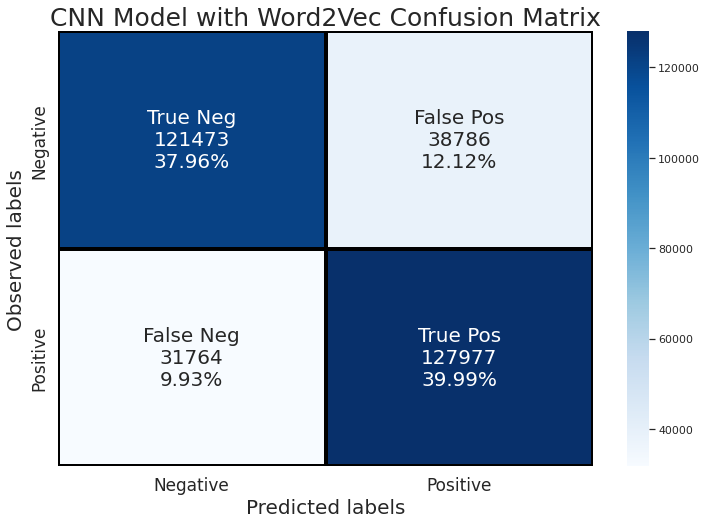

####################################################################################################

####################################################################################################


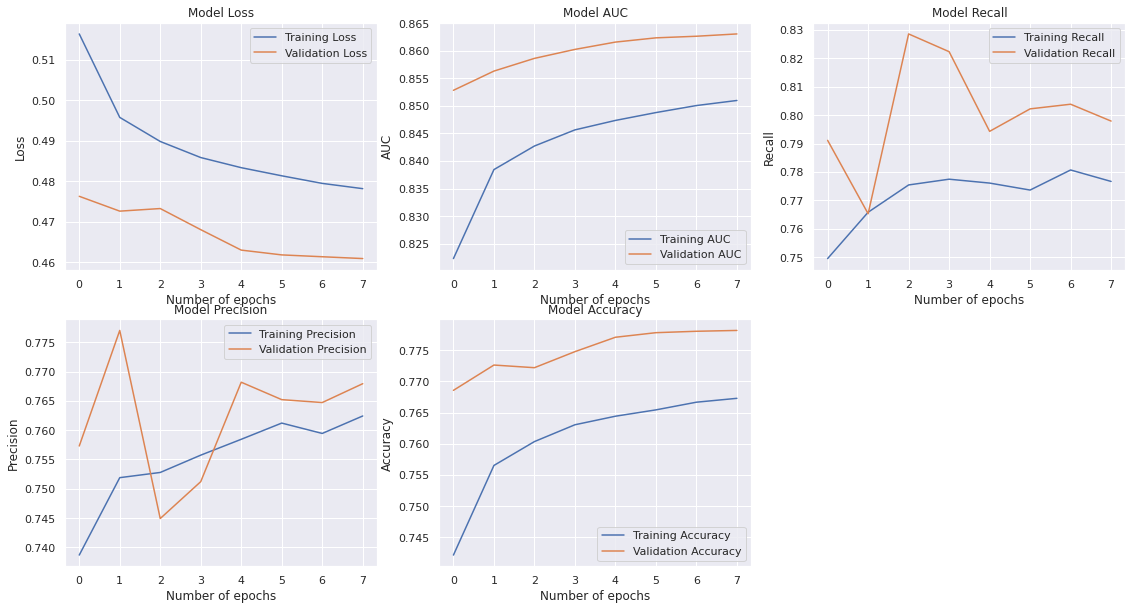

In [33]:
# Generate Report
title="CNN Model with Word2Vec"
deep_learning_report(y_test, y_pred, title, history)

### LSTM

In [20]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, Flatten
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [21]:
# Define the Bidirectional LSTM Model

def build_lstm_model(input_shape, embedding_matrix, learning_rate, LSTM_units, lr_decay, drp_rate):

  model = tf.keras.models.Sequential()

  model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                      output_dim=embedding_matrix.shape[1], 
                      weights = [embedding_matrix], input_length=input_shape, 
                      trainable = False))

  model.add(Bidirectional(CuDNNLSTM(LSTM_units, return_sequences=True)))
  model.add(BatchNormalization())
  model.add(Dropout(drp_rate))

  model.add(Bidirectional(CuDNNLSTM(LSTM_units)))
  model.add(BatchNormalization())
  model.add(Dropout(drp_rate))
  
  model.add(Dense(1, activation = "sigmoid"))

  model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = learning_rate, decay = lr_decay), 
                metrics = ['accuracy', 'AUC', 'Precision', 'Recall'])

  return model

#### Using GloVe Embedding

In [ ]:
lstm_model = build_lstm_model(maxlen, embedding_matrix, learning_rate=1e-5, 
                        LSTM_units=200, lr_decay=0, drp_rate=0.5)

lstm_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 69, 300)           66329700  
                                                                 
 bidirectional_14 (Bidirecti  (None, 69, 400)          803200    
 onal)                                                           
                                                                 
 batch_normalization_26 (Bat  (None, 69, 400)          1600      
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 69, 400)           0         
                                                                 
 bidirectional_15 (Bidirecti  (None, 400)              963200    
 onal)                                                           
                                                     

In [ ]:
file_path = "/content/drive/MyDrive/NLP Project/LSTM/lstm_model.hdf5" # Change the save model path if available

if not os.path.exists(file_path):
  print("The Model is not saved....\nTraining the Model on the training data...\n")
  check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                save_best_only = True, mode = "min")

  early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, 
                            patience = 3, min_delta=0.005)

  history = lstm_model.fit(train_padded, y_train, batch_size = 256, epochs = 40, validation_split=0.3, 
                          verbose = 1, callbacks = [check_point, early_stop])
  
  y_pred = lstm_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)q

else:
  print("The Model is saved....\nEvaluating Model on Test data...\n")
  # Load the weights of the Model
  lstm_model.load_weights(file_path)
  # Evaluate the model on test data set
  y_pred = lstm_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)


The Model is not saved....
Training the Model on the training data...

Epoch 1/40
3500/3500 [==============================] - ETA: 0s - loss: 0.7401 - accuracy: 0.6340 - auc: 0.6881 - precision: 0.6338 - recall: 0.6352
Epoch 1: val_loss improved from inf to 0.58182, saving model to /content/drive/MyDrive/NLP Project/LSTM/lstm_model.hdf5
3500/3500 [==============================] - 270s 76ms/step - loss: 0.7401 - accuracy: 0.6340 - auc: 0.6881 - precision: 0.6338 - recall: 0.6352 - val_loss: 0.5818 - val_accuracy: 0.7198 - val_auc: 0.7974 - val_precision: 0.7187 - val_recall: 0.7233
Epoch 2/40
3500/3500 [==============================] - ETA: 0s - loss: 0.6330 - accuracy: 0.6821 - auc: 0.7503 - precision: 0.6820 - recall: 0.6826
Epoch 2: val_loss improved from 0.58182 to 0.55488, saving model to /content/drive/MyDrive/NLP Project/LSTM/lstm_model.hdf5
3500/3500 [==============================] - 265s 76ms/step - loss: 0.6330 - accuracy: 0.6821 - auc: 0.7503 - precision: 0.6820 - recall:

####################################################################################################
	Classification Report for LSTM Model with GloVe:

               precision    recall  f1-score   support

    Negative       0.74      0.83      0.78    160259
    Positive       0.80      0.70      0.75    159741

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.76    320000
weighted avg       0.77      0.77      0.76    320000

####################################################################################################

####################################################################################################
AUC Score for LSTM Model with GloVe:  0.77
####################################################################################################

####################################################################################################
F1 Score for LSTM Model with GloVe:  0.76
#############################

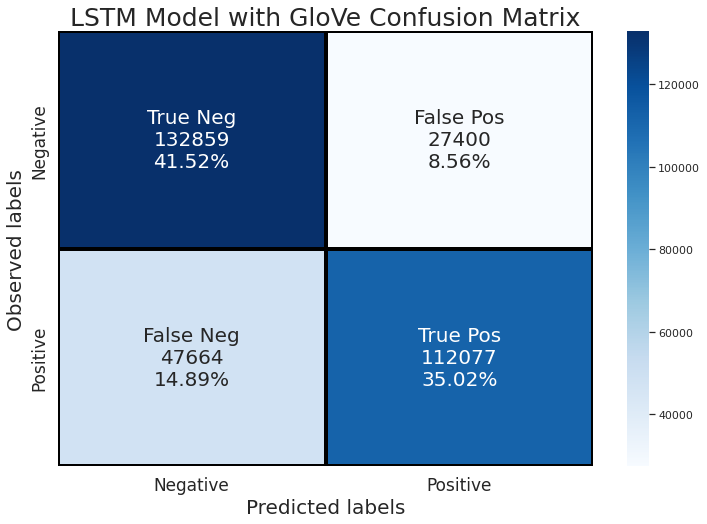

####################################################################################################

####################################################################################################


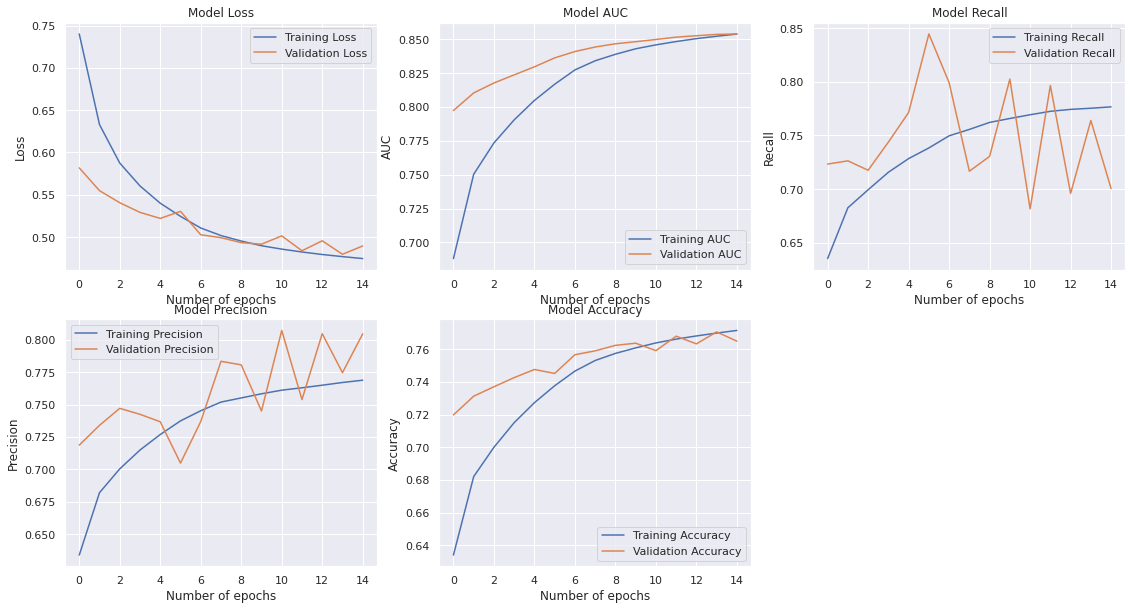

In [ ]:
# Generate Report
title="LSTM Model with GloVe"
deep_learning_report(y_test, y_pred, title, history)

#### Using Word2Vec Embedding

In [24]:
lstm_w2v_model = build_lstm_model(maxlen, w2v_embedding_matrix, learning_rate=1e-3, 
                        LSTM_units=200, lr_decay=0, drp_rate=0.5)

lstm_w2v_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 69, 300)           66329700  
                                                                 
 bidirectional_2 (Bidirectio  (None, 69, 400)          803200    
 nal)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 69, 400)          1600      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 69, 400)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 400)              963200    
 nal)                                                            
                                                      

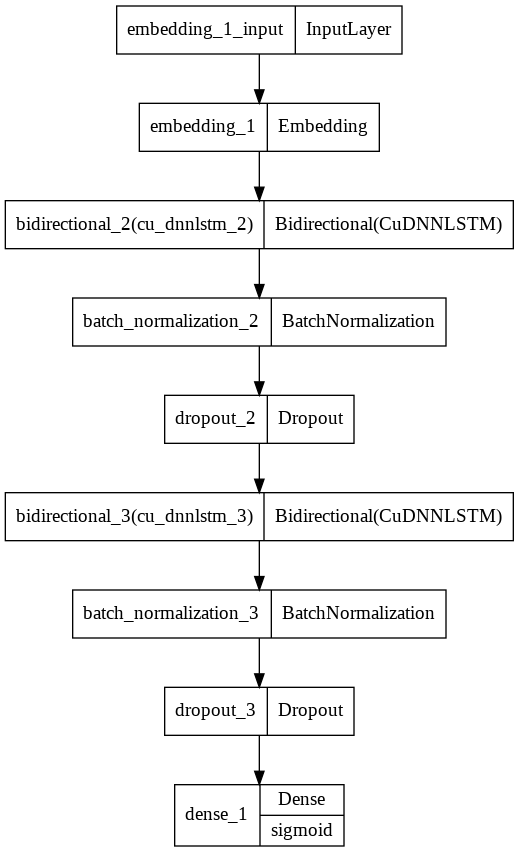

In [46]:
tf.keras.utils.plot_model(lstm_w2v_model, to_file='/content/drive/MyDrive/NLP Project/lstm_w2v_model.png',
                          show_layer_activations=True, rankdir='TB') 

In [25]:
file_path = "/content/drive/MyDrive/NLP Project/LSTM/lstm_w2v_model.hdf5" # Change the save model path if available

if not os.path.exists(file_path):
  print("The Model is not saved....\nTraining the Model on the training data...\n")
  check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                save_best_only = True, mode = "min")

  early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, 
                            patience = 3, min_delta=0.005)

  history = lstm_w2v_model.fit(train_padded, y_train, batch_size = 256, epochs = 40, validation_split=0.3, 
                          verbose = 1, callbacks = [check_point, early_stop])
  
  y_pred = lstm_w2v_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)

else:
  print("The Model is saved....\nEvaluating Model on Test data...\n")
  # Load the weights of the Model
  lstm_w2v_model.load_weights(file_path)
  # Evaluate the model on test data set
  y_pred = lstm_w2v_model.predict(test_padded)
  y_pred = np.where(y_pred >= 0.5, 1, 0)


The Model is not saved....
Training the Model on the training data...

Epoch 1/40
3500/3500 [==============================] - ETA: 0s - loss: 0.4818 - accuracy: 0.7682 - auc: 0.8496 - precision: 0.7655 - recall: 0.7736
Epoch 1: val_loss improved from inf to 0.47708, saving model to /content/drive/MyDrive/NLP Project/LSTM/lstm_w2v_model.hdf5
3500/3500 [==============================] - 259s 73ms/step - loss: 0.4818 - accuracy: 0.7682 - auc: 0.8496 - precision: 0.7655 - recall: 0.7736 - val_loss: 0.4771 - val_accuracy: 0.7714 - val_auc: 0.8670 - val_precision: 0.7262 - val_recall: 0.8718
Epoch 2/40
3500/3500 [==============================] - ETA: 0s - loss: 0.4553 - accuracy: 0.7839 - auc: 0.8670 - precision: 0.7807 - recall: 0.7898
Epoch 2: val_loss improved from 0.47708 to 0.45062, saving model to /content/drive/MyDrive/NLP Project/LSTM/lstm_w2v_model.hdf5
3500/3500 [==============================] - 254s 73ms/step - loss: 0.4553 - accuracy: 0.7839 - auc: 0.8670 - precision: 0.7807 -

####################################################################################################
	Classification Report for LSTM Model with Word2Vec:

               precision    recall  f1-score   support

    Negative       0.78      0.81      0.79    160259
    Positive       0.80      0.77      0.79    159741

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

####################################################################################################

####################################################################################################
AUC Score for LSTM Model with Word2Vec:  0.79
####################################################################################################

####################################################################################################
F1 Score for LSTM Model with Word2Vec:  0.79
####################

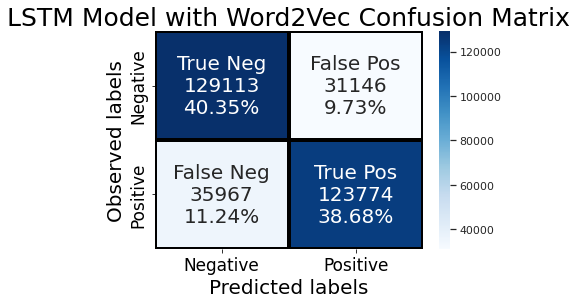

####################################################################################################

####################################################################################################


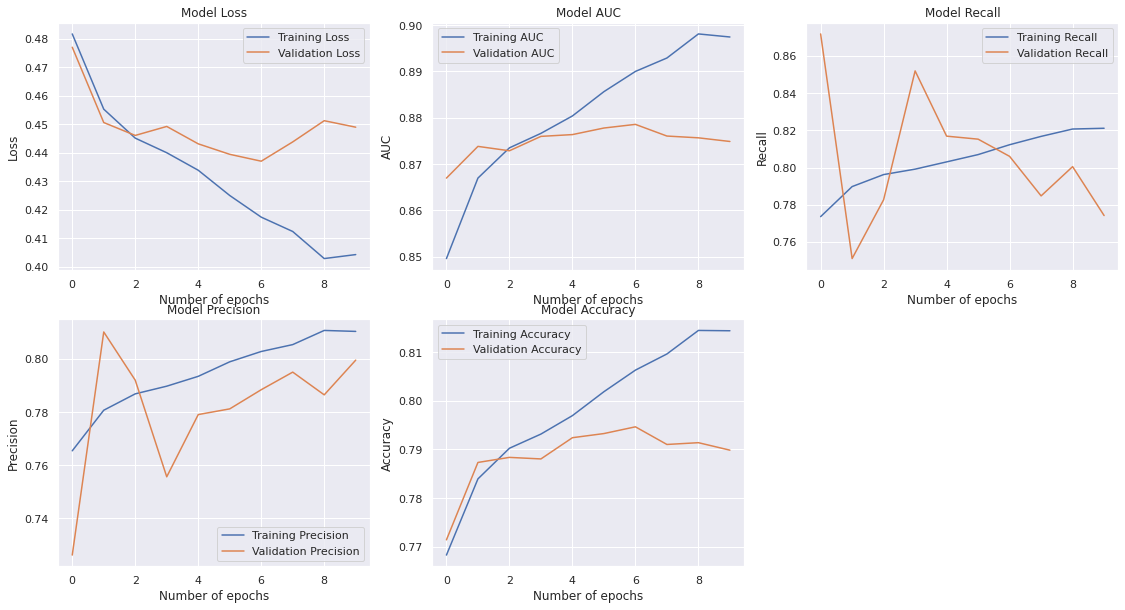

In [28]:
# Generate Report
title="LSTM Model with Word2Vec"
deep_learning_report(y_test, y_pred, title, history)